**This notebook analyses the contribution of MCS precipitation to total precipitation is different regions of South America**

In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from pathlib import Path
import trackpy
from iris.time import PartialDateTime
import cartopy.crs as ccrs
import xarray as xr
import netCDF4 as nc
import scipy
from scipy import ndimage
from scipy.ndimage import label, generate_binary_structure

#import packages that output memory usage:
#from sys import getsizeof

import tobac #tobac package cloned from https://github.com/tobac-project/tobac.git

import warnings
warnings.filterwarnings('ignore')

**Load in files**

In [89]:
## CPM-Hindcast ##
filename_2001 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2001.nc'
filename_2002 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2002.nc'
filename_2003 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2003.nc'
filename_2004 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2004.nc'
filename_2005 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2005.nc'
filename_2006 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2006.nc'
filename_2007 = '/scratch/hgilmour/cpm_HINDCAST/total_precip/yearly_files/regridded/regridded_total_precip_2007.nc'


precip_2001 = xr.open_dataset(filename_2001)
precip_2001 = precip_2001.unknown

precip_2002 = xr.open_dataset(filename_2002)
precip_2002 = precip_2002.unknown

precip_2003 = xr.open_dataset(filename_2003)
precip_2003 = precip_2003.unknown

precip_2004 = xr.open_dataset(filename_2004)
precip_2004 = precip_2004.unknown

precip_2005 = xr.open_dataset(filename_2005)
precip_2005 = precip_2005.unknown

precip_2006 = xr.open_dataset(filename_2006)
precip_2006 = precip_2006.unknown

precip_2007 = xr.open_dataset(filename_2007)
precip_2007 = precip_2007.unknown


In [59]:
daily_mean_precip_2001 = precip_2001.resample(time='D').mean()

mean_daily_mean_precip_2001 = daily_mean_precip_2001.resample(time='Y').mean()

mean_daily_mean_precip_2001 = mean_daily_mean_precip_2001*86400 ## *86400 to convert from kg m-2 s-1 to mm day-1

In [109]:
daily_mean_precip_2002 = precip_2002.resample(time='D').mean()

mean_daily_mean_precip_2002 = daily_mean_precip_2002.resample(time='Y').mean()

mean_daily_mean_precip_2002 = mean_daily_mean_precip_2002*86400

In [110]:
daily_mean_precip_2003 = precip_2003.resample(time='D').mean()

mean_daily_mean_precip_2003 = daily_mean_precip_2003.resample(time='Y').mean()

mean_daily_mean_precip_2003 = mean_daily_mean_precip_2003*86400

In [111]:
daily_mean_precip_2004 = precip_2004.resample(time='D').mean()

mean_daily_mean_precip_2004 = daily_mean_precip_2004.resample(time='Y').mean()

mean_daily_mean_precip_2004 = mean_daily_mean_precip_2004*86400

In [112]:
daily_mean_precip_2005 = precip_2005.resample(time='D').mean()

mean_daily_mean_precip_2005 = daily_mean_precip_2005.resample(time='Y').mean()

mean_daily_mean_precip_2005 = mean_daily_mean_precip_2005*86400

In [113]:
daily_mean_precip_2006 = precip_2006.resample(time='D').mean()

mean_daily_mean_precip_2006 = daily_mean_precip_2006.resample(time='Y').mean()

mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006*86400

In [114]:
daily_mean_precip_2007 = precip_2007.resample(time='D').mean()

mean_daily_mean_precip_2007 = daily_mean_precip_2007.resample(time='Y').mean()

mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007*86400

In [115]:
precip_all_cpm = xr.concat([mean_daily_mean_precip_2001, mean_daily_mean_precip_2002, mean_daily_mean_precip_2003, mean_daily_mean_precip_2004, mean_daily_mean_precip_2005, mean_daily_mean_precip_2006, mean_daily_mean_precip_2007], dim='time', compat='override', coords='all')

mean_daily_mean_precip_all_cpm = precip_all_cpm.mean(dim='time')  ## combining into 1 xarray dataarray for all years

mean_daily_mean_precip_all_cpm

Text(0, 0.5, ' ')

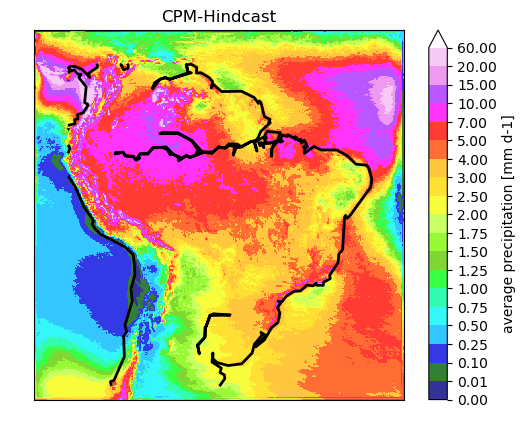

In [126]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# Irregular levels to illustrate the use of a proportional colorbar
levels = [0.00, 0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 3.00, 4.00, 5.00, 7.00, 10.00, 15.00, 20.00, 60.00]

fig = plt.figure()

ax = plt.subplot()
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_cpm.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]'})
ax.set_xlim(-85,-30)
ax.set_title('CPM-Hindcast')
ax.set_xlabel(' ')
ax.set_ylabel(' ')



In [127]:
### GPM IMERG ###

filename_2001 = '/scratch/hgilmour/obs/precip/precip_2001.nc'
filename_2002 = '/scratch/hgilmour/obs/precip/precip_2002.nc'
filename_2003 = '/scratch/hgilmour/obs/precip/precip_2003.nc'
filename_2004 = '/scratch/hgilmour/obs/precip/precip_2004.nc'
filename_2005 = '/scratch/hgilmour/obs/precip/precip_2005.nc'
filename_2006 = '/scratch/hgilmour/obs/precip/precip_2006.nc'
filename_2007 = '/scratch/hgilmour/obs/precip/precip_2007.nc'


precip_2001 = xr.open_dataset(filename_2001)
precip_2001 = precip_2001.precipitation_flux

precip_2002 = xr.open_dataset(filename_2002)
precip_2002 = precip_2002.precipitation_flux

precip_2003 = xr.open_dataset(filename_2003)
precip_2003 = precip_2003.precipitation_flux

precip_2004 = xr.open_dataset(filename_2004)
precip_2004 = precip_2004.precipitation_flux

precip_2005 = xr.open_dataset(filename_2005)
precip_2005 = precip_2005.precipitation_flux

precip_2006 = xr.open_dataset(filename_2006)
precip_2006 = precip_2006.precipitationCal

precip_2007 = xr.open_dataset(filename_2007)
precip_2007 = precip_2007.precipitationCal


In [148]:
daily_mean_precip_2001 = precip_2001.resample(time='D').mean()

mean_daily_mean_precip_2001 = daily_mean_precip_2001.resample(time='Y').mean()

mean_daily_mean_precip_2001 = mean_daily_mean_precip_2001*24  ## *24 to convert from mm h-1 to mm day-1

In [149]:
daily_mean_precip_2002 = precip_2002.resample(time='D').mean()

mean_daily_mean_precip_2002 = daily_mean_precip_2002.resample(time='Y').mean()

mean_daily_mean_precip_2002 = mean_daily_mean_precip_2002*24

In [150]:
daily_mean_precip_2003 = precip_2003.resample(time='D').mean()

mean_daily_mean_precip_2003 = daily_mean_precip_2003.resample(time='Y').mean()

mean_daily_mean_precip_2003 = mean_daily_mean_precip_2003*24

In [151]:
daily_mean_precip_2004 = precip_2004.resample(time='D').mean()

mean_daily_mean_precip_2004 = daily_mean_precip_2004.resample(time='Y').mean()

mean_daily_mean_precip_2004 = mean_daily_mean_precip_2004*24

In [152]:
daily_mean_precip_2005 = precip_2005.resample(time='D').mean()

mean_daily_mean_precip_2005 = daily_mean_precip_2005.resample(time='Y').mean()

mean_daily_mean_precip_2005 = mean_daily_mean_precip_2005*24

In [173]:
daily_mean_precip_2006 = precip_2006.resample(time='D').mean()

mean_daily_mean_precip_2006 = daily_mean_precip_2006.resample(time='Y').mean()

mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006*24

In [174]:
daily_mean_precip_2007 = precip_2007.resample(time='D').mean()

mean_daily_mean_precip_2007 = daily_mean_precip_2007.resample(time='Y').mean()

mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007*24

In [175]:
## removing the extra latitude value from the array for 2006 and 2007 so that they match with the rest of the years
mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006[:,:,:-1]
mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007[:,:,:-1]

In [180]:
## re-ordering the dimensions so they are the same as other years. This is required before concatenating them
mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006.transpose('time', 'lat', 'lon')
mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007.transpose('time', 'lat', 'lon')

In [187]:
## renaming the dimensions to match other years. This is required before concatenating them
mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006.rename({'lat': 'latitude','lon': 'longitude'})
mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007.rename({'lat': 'latitude','lon': 'longitude'})

In [191]:
## renaming the dataarray variable. This is required before concatenating them
mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006.rename('precipitation_flux')
mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007.rename('precipitation_flux')

In [193]:
precip_all_obs = xr.concat([mean_daily_mean_precip_2001, mean_daily_mean_precip_2002, mean_daily_mean_precip_2003, mean_daily_mean_precip_2004, mean_daily_mean_precip_2005, mean_daily_mean_precip_2006, mean_daily_mean_precip_2007], dim='time', compat='override', coords='all')

#precip_all_obs_2006_7 = xr.concat([mean_daily_mean_precip_2006, mean_daily_mean_precip_2007], dim='time', compat='override', coords='all')


mean_daily_mean_precip_all_obs = precip_all_obs.mean(dim='time')

mean_daily_mean_precip_all_obs

<xarray.DataArray 'precipitation_flux' (latitude: 551, longitude: 600)>
array([[2.9439514, 2.9565449, 2.9355116, ..., 4.551862 , 4.586397 ,
        4.5982504],
       [3.1172106, 3.1128325, 3.1113288, ..., 4.4100447, 4.456803 ,
        4.4489894],
       [3.09626  , 3.106897 , 3.0975947, ..., 4.4317274, 4.4532514,
        4.4559646],
       ...,
       [4.256973 , 4.115458 , 4.0170465, ..., 1.2638757, 1.2433773,
        1.1806155],
       [4.3248796, 4.2398915, 4.179778 , ..., 1.2404066, 1.241115 ,
        1.188276 ],
       [4.281396 , 4.2719393, 4.2490644, ..., 1.2774569, 1.1941578,
        1.1668262]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -89.95 -89.85 -89.75 ... -30.25 -30.15 -30.05
  * latitude   (latitude) float64 -40.05 -39.95 -39.85 ... 14.75 14.85 14.95

Text(0, 0.5, ' ')

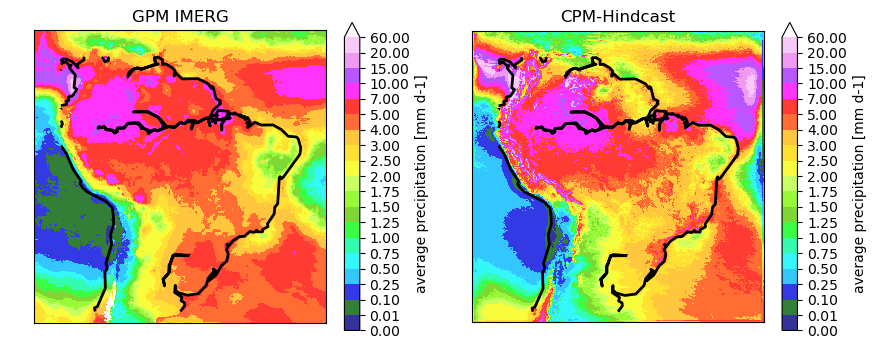

In [199]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# Irregular levels to illustrate the use of a proportional colorbar
levels = [0.00, 0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 3.00, 4.00, 5.00, 7.00, 10.00, 15.00, 20.00, 60.00]

fig = plt.figure(figsize=(16,10))

ax1 = plt.subplot(1,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_obs.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax1, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax1.set_xlim(-85,-30)
ax1.set_title('GPM IMERG')
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')


ax2 = plt.subplot(1,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_cpm.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax2, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax2.set_xlim(-85,-30)
ax2.set_title('CPM-Hindcast')
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')



In [200]:
## testing on 1 year of precip data from CPM-PD ##
filename_2001 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2001.nc'
filename_2002 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2002.nc'
filename_2003 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2003.nc'
filename_2004 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2004.nc'
filename_2005 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2005.nc'
filename_2006 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2006.nc'
filename_2007 = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2007.nc'


precip_2001 = xr.open_dataset(filename_2001)
precip_2001 = precip_2001.unknown

precip_2002 = xr.open_dataset(filename_2002)
precip_2002 = precip_2002.unknown

precip_2003 = xr.open_dataset(filename_2003)
precip_2003 = precip_2003.unknown

precip_2004 = xr.open_dataset(filename_2004)
precip_2004 = precip_2004.unknown

precip_2005 = xr.open_dataset(filename_2005)
precip_2005 = precip_2005.unknown

precip_2006 = xr.open_dataset(filename_2006)
precip_2006 = precip_2006.unknown

precip_2007 = xr.open_dataset(filename_2007)
precip_2007 = precip_2007.unknown

In [203]:
daily_mean_precip_2001 = precip_2001.resample(time='D').mean()

mean_daily_mean_precip_2001 = daily_mean_precip_2001.resample(time='Y').mean()

mean_daily_mean_precip_2001 = mean_daily_mean_precip_2001*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [205]:
daily_mean_precip_2002 = precip_2002.resample(time='D').mean()

mean_daily_mean_precip_2002 = daily_mean_precip_2002.resample(time='Y').mean()

mean_daily_mean_precip_2002 = mean_daily_mean_precip_2002*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [206]:
daily_mean_precip_2003 = precip_2003.resample(time='D').mean()

mean_daily_mean_precip_2003 = daily_mean_precip_2003.resample(time='Y').mean()

mean_daily_mean_precip_2003 = mean_daily_mean_precip_2003*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [207]:
daily_mean_precip_2004 = precip_2004.resample(time='D').mean()

mean_daily_mean_precip_2004 = daily_mean_precip_2004.resample(time='Y').mean()

mean_daily_mean_precip_2004 = mean_daily_mean_precip_2004*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [208]:
daily_mean_precip_2005 = precip_2005.resample(time='D').mean()

mean_daily_mean_precip_2005 = daily_mean_precip_2005.resample(time='Y').mean()

mean_daily_mean_precip_2005 = mean_daily_mean_precip_2005*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [209]:
daily_mean_precip_2006 = precip_2006.resample(time='D').mean()

mean_daily_mean_precip_2006 = daily_mean_precip_2006.resample(time='Y').mean()

mean_daily_mean_precip_2006 = mean_daily_mean_precip_2006*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [210]:
daily_mean_precip_2007 = precip_2007.resample(time='D').mean()

mean_daily_mean_precip_2007 = daily_mean_precip_2007.resample(time='Y').mean()

mean_daily_mean_precip_2007 = mean_daily_mean_precip_2007*86400  ## *86400 to convert from kg m-2 s-1 to mm day-1

In [211]:
precip_all_pd = xr.concat([mean_daily_mean_precip_2001, mean_daily_mean_precip_2002, mean_daily_mean_precip_2003, mean_daily_mean_precip_2004, mean_daily_mean_precip_2005, mean_daily_mean_precip_2006, mean_daily_mean_precip_2007], dim='time', compat='override', coords='all')

#precip_all_obs_2006_7 = xr.concat([mean_daily_mean_precip_2006, mean_daily_mean_precip_2007], dim='time', compat='override', coords='all')


mean_daily_mean_precip_all_pd = precip_all_pd.mean(dim='time')

mean_daily_mean_precip_all_pd

<xarray.DataArray 'unknown' (latitude: 550, longitude: 550)>
array([[4.93140722, 5.19110879, 5.17206257, ..., 7.35550701, 7.36214709,
        7.44696025],
       [4.89501967, 4.86670309, 4.25123118, ..., 5.686338  , 6.83615192,
        7.37279531],
       [4.90422471, 4.62210323, 3.2688227 , ..., 5.04795839, 6.67700769,
        7.40700201],
       ...,
       [0.3690099 , 0.28360307, 0.17307613, ..., 0.19731565, 0.35235628,
        0.36515597],
       [0.4265308 , 0.40161196, 0.34175698, ..., 0.3504806 , 0.38471214,
        0.3738954 ],
       [0.34139923, 0.4050493 , 0.3556981 , ..., 0.37813474, 0.38152386,
        0.39597734]])
Coordinates:
  * latitude   (latitude) float64 -39.95 -39.85 -39.75 ... 14.75 14.85 14.95
  * longitude  (longitude) float64 -84.95 -84.85 -84.75 ... -30.25 -30.15 -30.05

Text(0, 0.5, ' ')

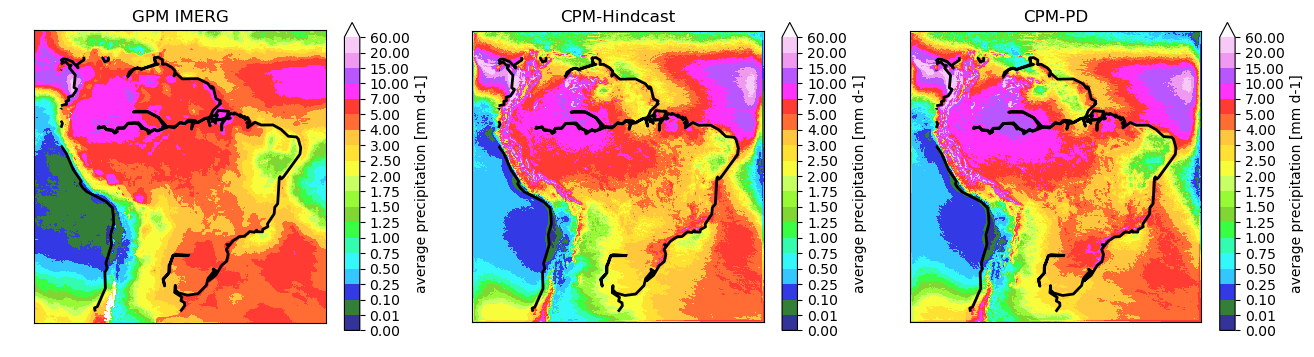

In [216]:
### Spectral is also a good cmap colour ###

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# Irregular levels to illustrate the use of a proportional colorbar
levels = [0.00, 0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 3.00, 4.00, 5.00, 7.00, 10.00, 15.00, 20.00, 60.00]

fig = plt.figure(figsize=(16,10))

ax1 = plt.subplot(1,3,1)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_obs.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax1, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax1.set_xlim(-85,-30)
ax1.set_title('GPM IMERG')
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')


ax2 = plt.subplot(1,3,2)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_cpm.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax2, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax2.set_xlim(-85,-30)
ax2.set_title('CPM-Hindcast')
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')


ax3 = plt.subplot(1,3,3)
m = Basemap(llcrnrlon=-80, llcrnrlat=-38,urcrnrlon=-30, urcrnrlat=10) # create Basemap object
m.drawcoastlines(linewidth=2,) # draw coastlines
precip = mean_daily_mean_precip_all_pd.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax3, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax3.set_xlim(-85,-30)
ax3.set_title('CPM-PD')
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')



In [260]:
### Plots of bias in CPM-Hindcast and CPM-PD compared to GPM IMERG ###
bias_cpm = mean_daily_mean_precip_all_cpm - mean_daily_mean_precip_all_obs
bias_pd = mean_daily_mean_precip_all_pd - mean_daily_mean_precip_all_obs

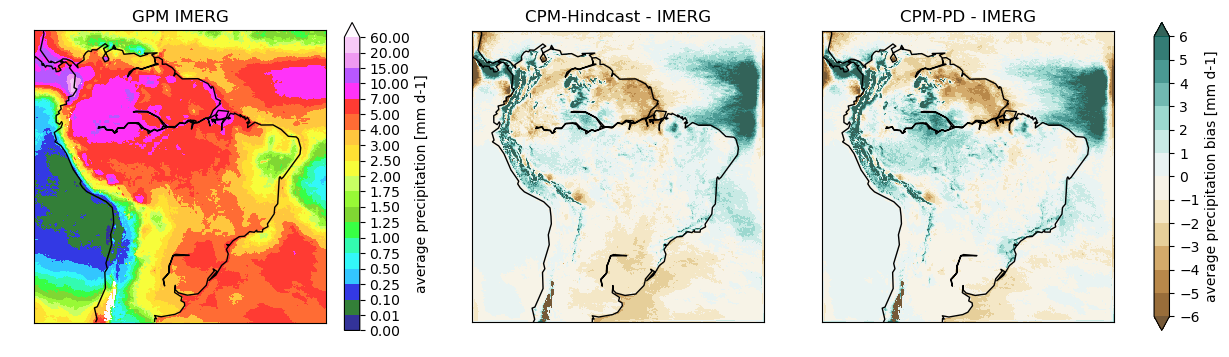

In [296]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

# Irregular levels to illustrate the use of a proportional colorbar
levels = [0.00, 0.01, 0.10, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.50, 3.00, 4.00, 5.00, 7.00, 10.00, 15.00, 20.00, 60.00]
levels_1 = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]

fig = plt.figure(figsize=(16,10))

ax1 = plt.subplot(1,3,1)
m = Basemap(llcrnrlon=-85, llcrnrlat=-40,urcrnrlon=-30, urcrnrlat=15) # create Basemap object
m.drawcoastlines(linewidth=1) # draw coastlines
precip_obs = mean_daily_mean_precip_all_obs.plot(levels=levels, cmap='gist_ncar', alpha=0.8, ax=ax1,add_colorbar=False)#, cbar_kwargs={'ticks': levels, 'label': 'average precipitation [mm d-1]', 'shrink': 0.4})
ax1.set_xlim(-85,-30)
ax1.set_title('GPM IMERG')
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')


ax2 = plt.subplot(1,3,2)
m = Basemap(llcrnrlon=-85, llcrnrlat=-40,urcrnrlon=-30, urcrnrlat=15) # create Basemap object
m.drawcoastlines(linewidth=1) # draw coastlines
precip = bias_cpm.plot(levels=levels_1, cmap='BrBG', alpha=0.8, ax=ax2, add_colorbar=False)#, cbar_kwargs={'ticks': levels_1,'label': 'average precipitation bias [mm d-1]', 'shrink': 0.4})
ax2.set_xlim(-85,-30)
ax2.set_title('CPM-Hindcast - IMERG')
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')


ax3 = plt.subplot(1,3,3)
m = Basemap(llcrnrlon=-85, llcrnrlat=-40,urcrnrlon=-30, urcrnrlat=15) # create Basemap object
m.drawcoastlines(linewidth=1) # draw coastlines
precip = bias_pd.plot(levels=levels_1, cmap='BrBG', alpha=0.8, ax=ax3, add_colorbar=False)#, cbar_kwargs={'ticks': levels_1,'label': 'average precipitation bias [mm d-1]', 'shrink': 0.4})
ax3.set_xlim(-85,-30)
ax3.set_title('CPM-PD - IMERG')
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')


#fig.subplots_adjust(right=0.9, wspace=0.1, hspace=0.12)
cbar = fig.colorbar(precip_obs,ticks=levels, ax=[ax1], shrink=0.4, extend='max')
cbar_2 = fig.colorbar(precip, ticks=levels_1, ax=[ax2, ax3], shrink=0.4, extend='both')

cbar.set_label(label='average precipitation [mm d-1]')
#cbar.ax.tick_params(labelsize=14)
#cbar.ax.set_xticklabels(levels)

cbar_2.set_label(label='average precipitation bias [mm d-1]')
#cbar_2.ax.tick_params(labelsize=14)
#cbar.ax.set_xticklabels(levels_1)



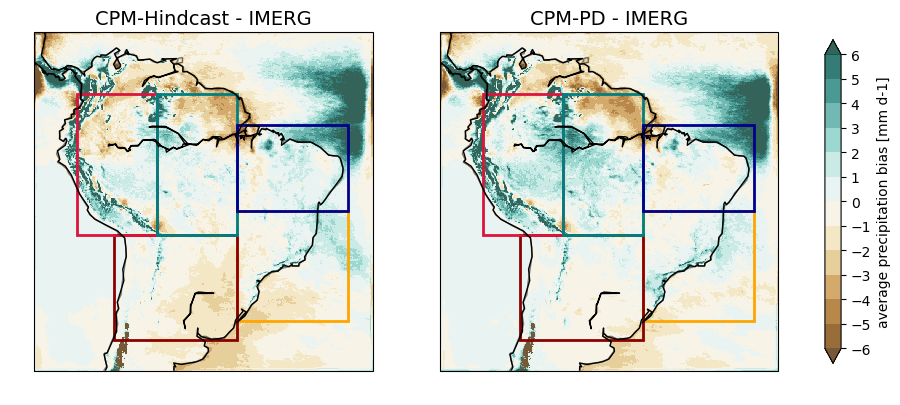

In [297]:
## split this file down into regions ##
## Create regional boxes & plot them on a map ##

import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

f=14
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.set_extent([-85,-30,-40,12], crs=ccrs.PlateCarree())
ax1.coastlines(alpha=0.5)

m = Basemap(llcrnrlon=-85, llcrnrlat=-40,urcrnrlon=-30, urcrnrlat=15) # create Basemap object
m.drawcoastlines(linewidth=1) # draw coastlines
precip = bias_cpm.plot(levels=levels_1, cmap='BrBG', alpha=0.8, ax=ax1, add_colorbar=False)#, cbar_kwargs={'ticks': levels_1,'label': 'average precipitation bias [mm d-1]', 'shrink': 0.4})
ax1.set_xlim(-85,-30)
ax1.set_title('CPM-Hindcast - IMERG', fontsize=14)
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')

### South East Brazil (52-34^w, 32-14^S) ###
### ------------------------------------ ###
seb = ax1.add_patch(mpatches.Rectangle(xy=[-52, -32], width=18, height=18, linewidth=2,
                                facecolor='none', edgecolor='orange',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.61, 0.45, 'SEB',color='orange',transform=ax1.transAxes,fontsize=f)


### La Plata Basin (72-52^W, 35-18^S) ###
### --------------------------------- ###
lpb = ax1.add_patch(mpatches.Rectangle(xy=[-72, -35], width=20, height=17, linewidth=2,
                                facecolor='none', edgecolor='darkred',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.24, 0.37, 'LPB',color='darkred',transform=ax1.transAxes,fontsize=f)


### Western Amazon (78-65^W, 18-5^S) ###
### -------------------------------- ###
wamz = ax1.add_patch(mpatches.Rectangle(xy=[-78, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='crimson',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.14, 0.82, 'WAMZ',color='crimson',transform=ax1.transAxes,fontsize=f)


### Eastern Amazon (65-52^W, 18-5^S) ###
### -------------------------------- ###
eamz = ax1.add_patch(mpatches.Rectangle(xy=[-65, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='teal',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.37, 0.82, 'EAMZ',color='teal',transform=ax1.transAxes,fontsize=f)


### North East Brazil (52-34^W, 15-0^S) ###
### ----------------------------------- ###
neb = ax1.add_patch(mpatches.Rectangle(xy=[-52, -14], width=18, height=14, linewidth=2,
                                facecolor='none', edgecolor='darkblue',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.61, 0.72, 'NEB',color='darkblue',transform=ax1.transAxes,fontsize=f)




ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
ax2.set_extent([-85,-30,-40,12], crs=ccrs.PlateCarree())
ax2.coastlines(alpha=0.5)

m = Basemap(llcrnrlon=-85, llcrnrlat=-40,urcrnrlon=-30, urcrnrlat=15) # create Basemap object
m.drawcoastlines(linewidth=1) # draw coastlines
precip = bias_pd.plot(levels=levels_1, cmap='BrBG', alpha=0.8, ax=ax2, add_colorbar=False)#, cbar_kwargs={'ticks': levels_1,'label': 'average precipitation bias [mm d-1]', 'shrink': 0.4})
ax2.set_xlim(-85,-30)
ax2.set_title('CPM-PD - IMERG', fontsize=14)
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

### South East Brazil (52-34^w, 32-14^S) ###
### ------------------------------------ ###
seb = ax2.add_patch(mpatches.Rectangle(xy=[-52, -32], width=18, height=18, linewidth=2,
                                facecolor='none', edgecolor='orange',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.61, 0.45, 'SEB',color='orange',transform=ax1.transAxes,fontsize=f)


### La Plata Basin (72-52^W, 35-18^S) ###
### --------------------------------- ###
lpb = ax2.add_patch(mpatches.Rectangle(xy=[-72, -35], width=20, height=17, linewidth=2,
                                facecolor='none', edgecolor='darkred',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.24, 0.37, 'LPB',color='darkred',transform=ax1.transAxes,fontsize=f)


### Western Amazon (78-65^W, 18-5^S) ###
### -------------------------------- ###
wamz = ax2.add_patch(mpatches.Rectangle(xy=[-78, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='crimson',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.14, 0.82, 'WAMZ',color='crimson',transform=ax1.transAxes,fontsize=f)


### Eastern Amazon (65-52^W, 18-5^S) ###
### -------------------------------- ###
eamz = ax2.add_patch(mpatches.Rectangle(xy=[-65, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='teal',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.37, 0.82, 'EAMZ',color='teal',transform=ax1.transAxes,fontsize=f)


### North East Brazil (52-34^W, 15-0^S) ###
### ----------------------------------- ###
neb = ax2.add_patch(mpatches.Rectangle(xy=[-52, -14], width=18, height=14, linewidth=2,
                                facecolor='none', edgecolor='darkblue',
                                transform=ccrs.PlateCarree()))
#ax1.text(0.61, 0.72, 'NEB',color='darkblue',transform=ax1.transAxes,fontsize=f)


cbar_2 = fig.colorbar(precip, ticks=levels_1, ax=[ax1, ax2], shrink=0.35, extend='both')

cbar_2.set_label(label='average precipitation bias [mm d-1]')



**Working out lat and lons of regional boxes**

In [78]:
## taking slices of the precip_2001 dataset for each region box

eamz_precip = precip_2001.loc[dict(latitude=slice(-18, 5), longitude=slice(-65, -52))]
wamz_precip = precip_2001.loc[dict(latitude=slice(-18, 5), longitude=slice(-78, -65))]
neb_precip = precip_2001.loc[dict(latitude=slice(-14, 0), longitude=slice(-52, -34))]
seb_precip = precip_2001.loc[dict(latitude=slice(-32, -14), longitude=slice(-52, -34))]
lpb_precip = precip_2001.loc[dict(latitude=slice(-35, -18), longitude=slice(-72, -52))]


eamz_precip = eamz_precip.rename('eamz')
wamz_precip = wamz_precip.rename('wamz')
neb_precip = neb_precip.rename('neb')
seb_precip = seb_precip.rename('seb')
lpb_precip = lpb_precip.rename('lpb')

    


**Loop to calculate total precip per region per month**

In [79]:
## creating an empty dataframe to add total precip by region data to later
total_precip = pd.DataFrame(columns=['region','month','year','sum_of_precip (mm)', 'heavy_precip (mm)', 'extreme_precip (mm)'])

In [80]:
i = 0
datasets = [precip_2001, precip_2002, precip_2003, precip_2004, precip_2005, precip_2006, precip_2007]

for file in datasets:
    print(file)
    year = file[0,0,0].time.dt.year.data
    print(year)

    eamz_precip = file.loc[dict(latitude=slice(-18, 5), longitude=slice(-65, -52))]
    wamz_precip = file.loc[dict(latitude=slice(-18, 5), longitude=slice(-78, -65))]
    neb_precip = file.loc[dict(latitude=slice(-14, 0), longitude=slice(-52, -34))]
    seb_precip = file.loc[dict(latitude=slice(-32, -14), longitude=slice(-52, -34))]
    lpb_precip = file.loc[dict(latitude=slice(-35, -18), longitude=slice(-72, -52))]
    # if year == 2006:
    #     eamz_precip = file.loc[dict(lat=slice(-18, 5), lon=slice(-65, -52))]
    #     wamz_precip = file.loc[dict(lat=slice(-18, 5), lon=slice(-78, -65))]
    #     neb_precip = file.loc[dict(lat=slice(-14, 0), lon=slice(-52, -34))]
    #     seb_precip = file.loc[dict(lat=slice(-32, -14), lon=slice(-52, -34))]
    #     lpb_precip = file.loc[dict(lat=slice(-35, -18), lon=slice(-72, -52))]
    
    # elif year == 2007:
    #     eamz_precip = file.loc[dict(lat=slice(-18, 5), lon=slice(-65, -52))]
    #     wamz_precip = file.loc[dict(lat=slice(-18, 5), lon=slice(-78, -65))]
    #     neb_precip = file.loc[dict(lat=slice(-14, 0), lon=slice(-52, -34))]
    #     seb_precip = file.loc[dict(lat=slice(-32, -14), lon=slice(-52, -34))]
    #     lpb_precip = file.loc[dict(lat=slice(-35, -18), lon=slice(-72, -52))]        
    
    # else:
    #     eamz_precip = file.loc[dict(latitude=slice(-18, 5), longitude=slice(-65, -52))]
    #     wamz_precip = file.loc[dict(latitude=slice(-18, 5), longitude=slice(-78, -65))]
    #     neb_precip = file.loc[dict(latitude=slice(-14, 0), longitude=slice(-52, -34))]
    #     seb_precip = file.loc[dict(latitude=slice(-32, -14), longitude=slice(-52, -34))]
    #     lpb_precip = file.loc[dict(latitude=slice(-35, -18), longitude=slice(-72, -52))]


    eamz_precip = eamz_precip.rename('eamz')
    wamz_precip = wamz_precip.rename('wamz')
    neb_precip = neb_precip.rename('neb')
    seb_precip = seb_precip.rename('seb')
    lpb_precip = lpb_precip.rename('lpb')

    dataarrays = [eamz_precip, wamz_precip, neb_precip, seb_precip, lpb_precip]

    for array in dataarrays:
        print(array)
        region = array.name
        for month in np.unique(array.time.dt.month):
            month = month
            subset = array[array.time.dt.month == month]
            year = year
            precip = subset.data.sum()*3600
            precip_extreme = subset.data[subset.data>=0.01388888888888888888].sum()*3600 # 0.0139 is the equivalent to 50 mm hr-1 in kg m-2 s-1
            precip_heavy = subset.data[subset.data>=0.00277777777777777777].sum()*3600 # 0.0028 is the equivalent to 10 mm hr-1 in kg m-2 s-1

            total_precip.loc[i] = [region, month, year, precip, precip_heavy, precip_extreme]
            i = i+1
    print('Finished for year: ', year)

<xarray.DataArray 'precipitation_flux' (time: 8760, latitude: 550,
                                        longitude: 600)>
[2890800000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01T00:29:59 ... 2001-12-31T23:29:59
  * longitude  (longitude) float64 -89.95 -89.85 -89.75 ... -30.25 -30.15 -30.05
  * latitude   (latitude) float64 -39.95 -39.85 -39.75 ... 14.75 14.85 14.95
Attributes:
    standard_name:  precipitation_flux
    units:          mm h-1
2001
<xarray.DataArray 'eamz' (time: 8760, latitude: 230, longitude: 130)>
[261924000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01T00:29:59 ... 2001-12-31T23:29:59
  * longitude  (longitude) float64 -64.95 -64.85 -64.75 ... -52.25 -52.15 -52.05
  * latitude   (latitude) float64 -17.95 -17.85 -17.75 -17.65 ... 4.75 4.85 4.95
Attributes:
    standard_name:  precipitation_flux
    units:          mm h-1
<xarray.DataArray 'wamz' (time: 8760, latitude: 230, longitu

KeyboardInterrupt: 

In [ ]:
total_precip

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        6.983107e+06       3.914179e+06   
1     eamz      2  2001        5.489727e+06       3.190386e+06   
2     eamz      3  2001        7.346489e+06       4.443044e+06   
3     eamz      4  2001        6.834120e+06       4.090457e+06   
4     eamz      5  2001        5.680223e+06       3.580528e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        2.532695e+06       3.929142e+05   
416    lpb      9  2007        1.919800e+06       2.044453e+05   
417    lpb     10  2007        3.233813e+06       1.109824e+06   
418    lpb     11  2007        3.300188e+06       1.312620e+06   
419    lpb     12  2007        3.800018e+06       1.679857e+06   

     extreme_precip (mm)  
0          315265.155029  
1          248572.265625  
2          479212.426758  
3          387150.677490  
4          353974.493408  
..                   ...  
415          1129.144657  
416           605.464911  
417         66090.646362  
418         74047.755432  
419         96169.530487  

[420 rows x 6 columns]

In [ ]:
total_precip.to_hdf('/project/cssp_brazil/mcs_tracking_HG/analysis/total_rainfall_by_region/cpm_pd.hdf', 'table')

**START FROM HERE NOW THAT THE TOTAL REGION RAINFALL DATAFRAMES HAVE BEEN CREATED...**

In [ ]:
obs_file = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/analysis/total_rainfall_by_region/satellite_obs.hdf', 'table')
cpm_file = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/analysis/total_rainfall_by_region/cpm_hindcast.hdf', 'table')
pd_file = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/analysis/total_rainfall_by_region/cpm_pd.hdf', 'table')


In [ ]:
type = ['GPM-IMERG'] * obs_file.shape[0] # adding a new column called 'type' ready for when the obs and cpm dataframes are combined to 1 to help with differentiating them

obs_file['type'] = type

obs_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        8.961834e+06       1.777290e+06   
1     eamz      2  2001        6.503194e+06       1.081699e+06   
2     eamz      3  2001        6.995929e+06       1.256366e+06   
3     eamz      4  2001        5.610566e+06       1.014347e+06   
4     eamz      5  2001        5.485962e+06       1.044445e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        7.922114e+05       9.303177e+04   
416    lpb      9  2007        1.456312e+06       1.544074e+05   
417    lpb     10  2007        2.926988e+06       4.639582e+05   
418    lpb     11  2007        2.583257e+06       5.708591e+05   
419    lpb     12  2007        3.578524e+06       6.349104e+05   

     extreme_precip (mm)       type  
0           33442.812500  GPM-IMERG  
1           20748.798828  GPM-IMERG  
2           33688.562500  GPM-IMERG  
3           41627.265625  GPM-IMERG  
4           36410.445312  GPM-IMERG  
..                   ...        ...  
415           689.989990  GPM-IMERG  
416             0.000000  GPM-IMERG  
417             0.000000  GPM-IMERG  
418          2852.005615  GPM-IMERG  
419          6179.007324  GPM-IMERG  

[420 rows x 7 columns]

In [ ]:
type = ['CPM-Hindcast'] * cpm_file.shape[0]
cpm_file['type'] = type
cpm_file['sum_of_precip (mm)'] = cpm_file['sum_of_precip (mm)']

cpm_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        7.011980e+06       4.019549e+06   
1     eamz      2  2001        6.129107e+06       3.604825e+06   
2     eamz      3  2001        6.283303e+06       3.837559e+06   
3     eamz      4  2001        4.781611e+06       2.857683e+06   
4     eamz      5  2001        3.980619e+06       2.425499e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        3.088735e+05       1.180283e+02   
416    lpb      9  2007        7.537811e+05       6.122119e+04   
417    lpb     10  2007        2.272708e+06       6.395178e+05   
418    lpb     11  2007        2.313406e+06       9.929137e+05   
419    lpb     12  2007        3.040336e+06       1.267212e+06   

     extreme_precip (mm)          type  
0          379341.870117  CPM-Hindcast  
1          346279.888916  CPM-Hindcast  
2          410591.162109  CPM-Hindcast  
3          287878.051758  CPM-Hindcast  
4          234118.487549  CPM-Hindcast  
..                   ...           ...  
415             0.000000  CPM-Hindcast  
416             0.000000  CPM-Hindcast  
417         20172.771263  CPM-Hindcast  
418         59986.175537  CPM-Hindcast  
419         97210.759735  CPM-Hindcast  

[420 rows x 7 columns]

In [ ]:
type = ['CPM-PD'] * pd_file.shape[0]
pd_file['type'] = type
pd_file['sum_of_precip (mm)'] = pd_file['sum_of_precip (mm)']

pd_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        6.983107e+06       3.914179e+06   
1     eamz      2  2001        5.489727e+06       3.190386e+06   
2     eamz      3  2001        7.346489e+06       4.443044e+06   
3     eamz      4  2001        6.834120e+06       4.090457e+06   
4     eamz      5  2001        5.680223e+06       3.580528e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        2.532695e+06       3.929142e+05   
416    lpb      9  2007        1.919800e+06       2.044453e+05   
417    lpb     10  2007        3.233813e+06       1.109824e+06   
418    lpb     11  2007        3.300188e+06       1.312620e+06   
419    lpb     12  2007        3.800018e+06       1.679857e+06   

     extreme_precip (mm)    type  
0          315265.155029  CPM-PD  
1          248572.265625  CPM-PD  
2          479212.426758  CPM-PD  
3          387150.677490  CPM-PD  
4          353974.493408  CPM-PD  
..                   ...     ...  
415          1129.144657  CPM-PD  
416           605.464911  CPM-PD  
417         66090.646362  CPM-PD  
418         74047.755432  CPM-PD  
419         96169.530487  CPM-PD  

[420 rows x 7 columns]

In [ ]:
## In GPM_IMERG, the sum_of_precip (mm) for wamz in 05 2001 is 10^38 (much too high so something weird is going on with the data). Therefore, this month of wamz data needs to be removed from the dataframe before plotting... ##

# create a Boolean mask for the rows to remove
mask = obs_file['sum_of_precip (mm)'] > 10000000

obs_file = obs_file[~mask]

# print the resulting DataFrame
print(obs_file)


    region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        8.961834e+06       1.777290e+06   
1     eamz      2  2001        6.503194e+06       1.081699e+06   
2     eamz      3  2001        6.995929e+06       1.256366e+06   
3     eamz      4  2001        5.610566e+06       1.014347e+06   
4     eamz      5  2001        5.485962e+06       1.044445e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        7.922114e+05       9.303177e+04   
416    lpb      9  2007        1.456312e+06       1.544074e+05   
417    lpb     10  2007        2.926988e+06       4.639582e+05   
418    lpb     11  2007        2.583257e+06       5.708591e+05   
419    lpb     12  2007        3.578524e+06       6.349104e+05   

     extreme_precip (mm)       type  
0           33442.812500  GPM-IMERG  
1           20748.798828  GPM-IMERG  
2           33688.562500  GPM-IMERG  
3           41627.265625  GPM-IMERG  
4           36410

In [ ]:
## Join the 2 separate dataframes together (obs and cpm to make it easier to plot) ##
combined = cpm_file.append(obs_file)

In [ ]:
combined = combined.append(pd_file)

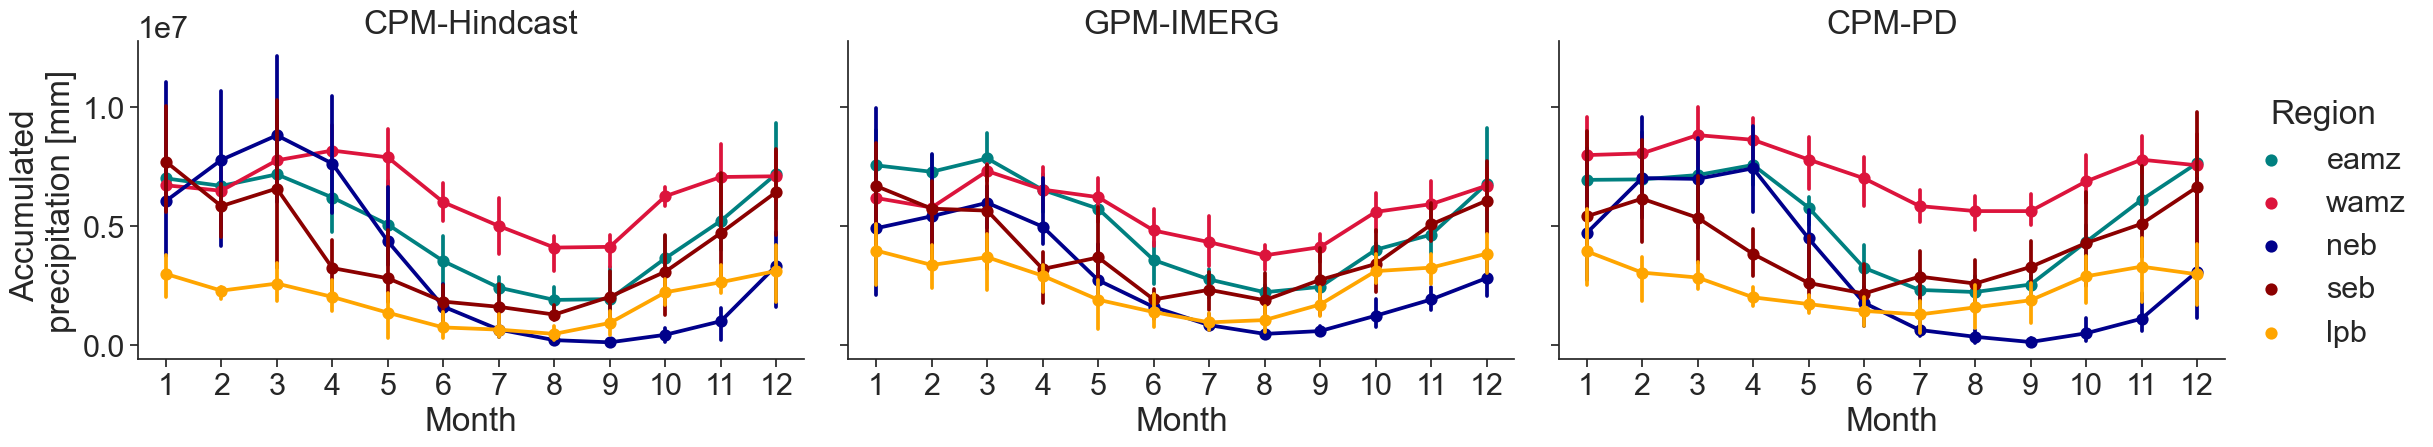

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", font_scale=2)

g = sns.catplot(x="month", y="sum_of_precip (mm)", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False), errorbar=("pi", 100)
)
g.set_axis_labels("Month", "Accumulated \nprecipitation [mm]")
g.legend.set_title("Region")
g.set_titles("{col_name}")
#plt.ylim(0,10000000)
#plt.text(-13.8,14000000,'Mean monthly accumulated precipitation per region per month', fontsize=20)

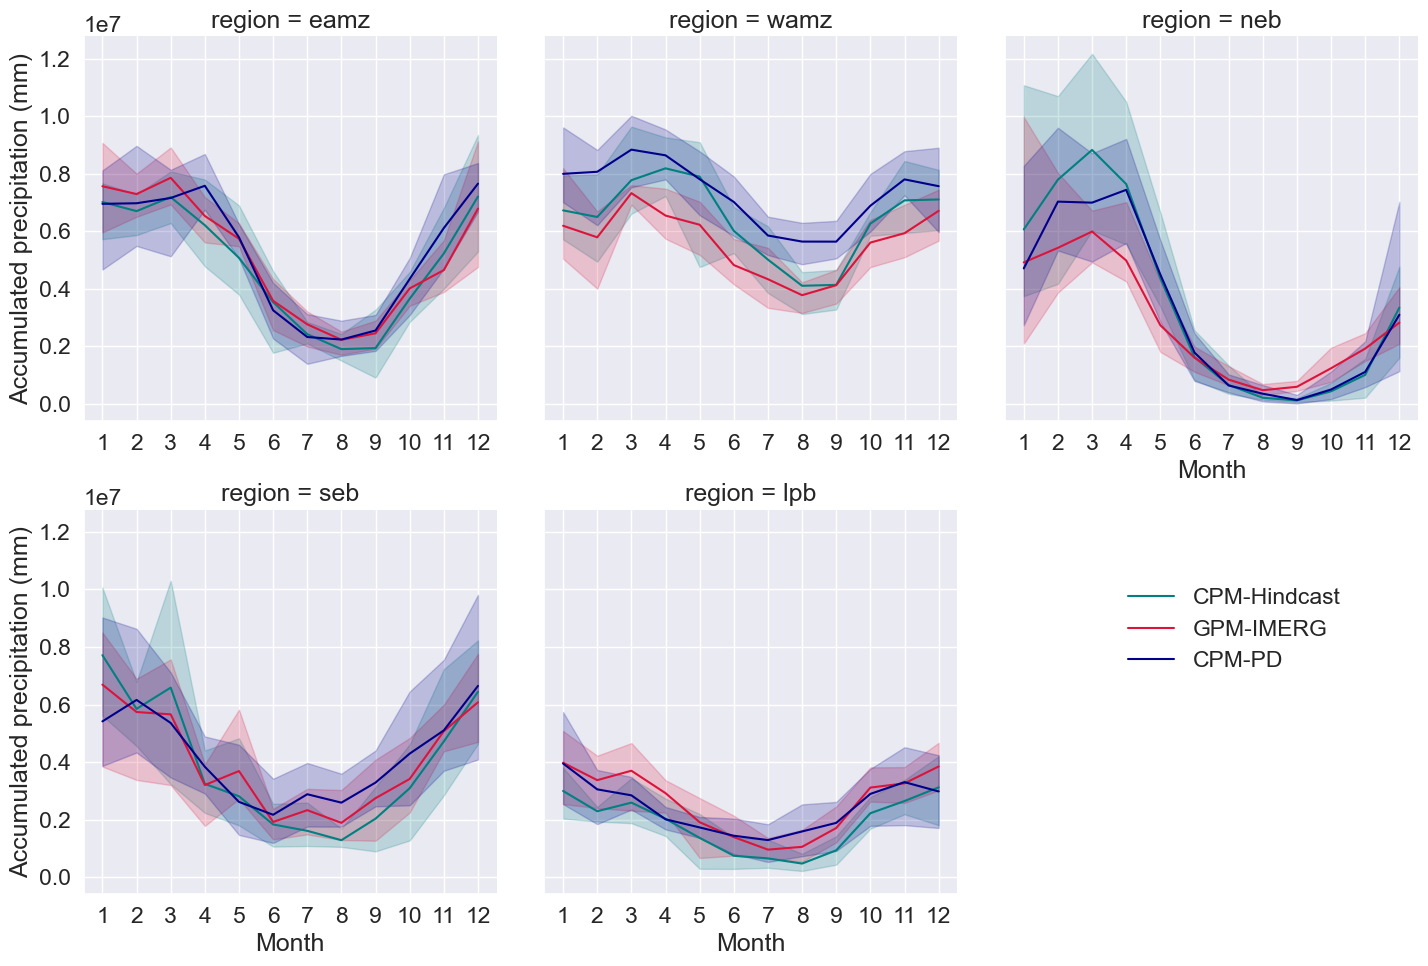

In [ ]:
sns.set_theme(style="whitegrid")
#sns.set(rc={'figure.figsize':(11.7,11.27)})
sns.set(font_scale=1.5)

g = sns.relplot(
    data=combined, x="month", y="sum_of_precip (mm)", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), errorbar=("pi", 100)
)

g.set_axis_labels("Month", "Accumulated precipitation (mm)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

**Loop to calculate total accumulated *EXTREME* precipitation per region per month**

Text(-10, 1000000, 'Mean monthly accumulated extreme precipitation (>=50mm/hr) per region per month')

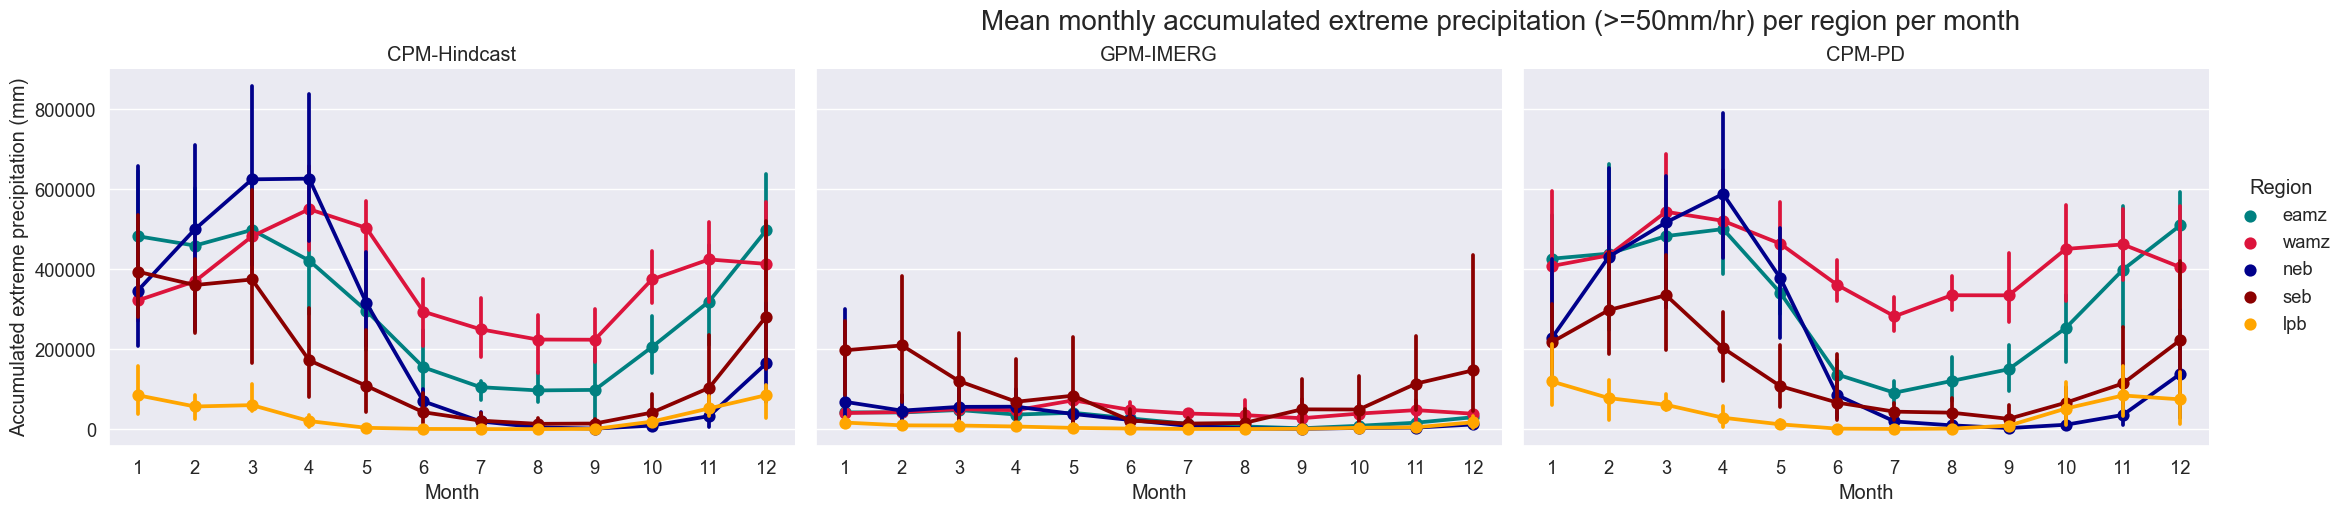

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.catplot(x="month", y="extreme_precip (mm)", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False), errorbar=("pi", 100)
)
g.set_axis_labels("Month", "Accumulated extreme precipitation (mm)")
g.legend.set_title("Region")
g.set_titles("{col_name}")
#plt.ylim(0,700000)
plt.text(-10,1000000,'Mean monthly accumulated extreme precipitation (>=50mm/hr) per region per month', fontsize=20)

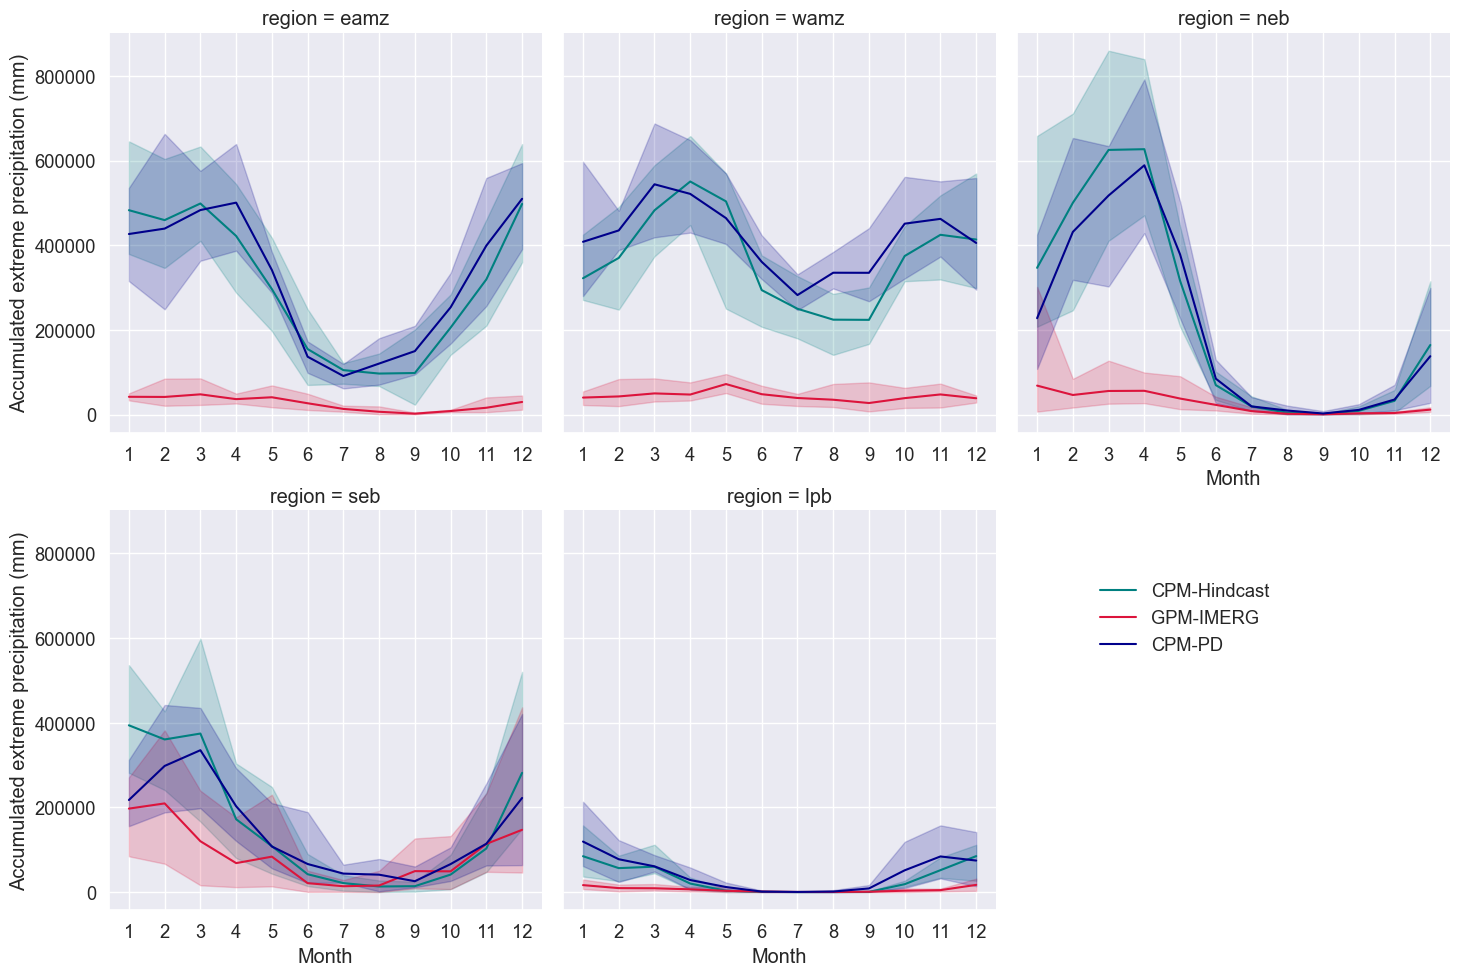

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.relplot(
    data=combined, x="month", y="extreme_precip (mm)", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), errorbar=("pi", 100)
)

g.set_axis_labels("Month", "Accumulated extreme precipitation (mm)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

**Plots for the total accumulation of *HEAVY* rainfall in each region per month**

Text(-10, 9000000, 'Mean monthly accumulated extreme precipitation (>=10mm/hr) per region per month')

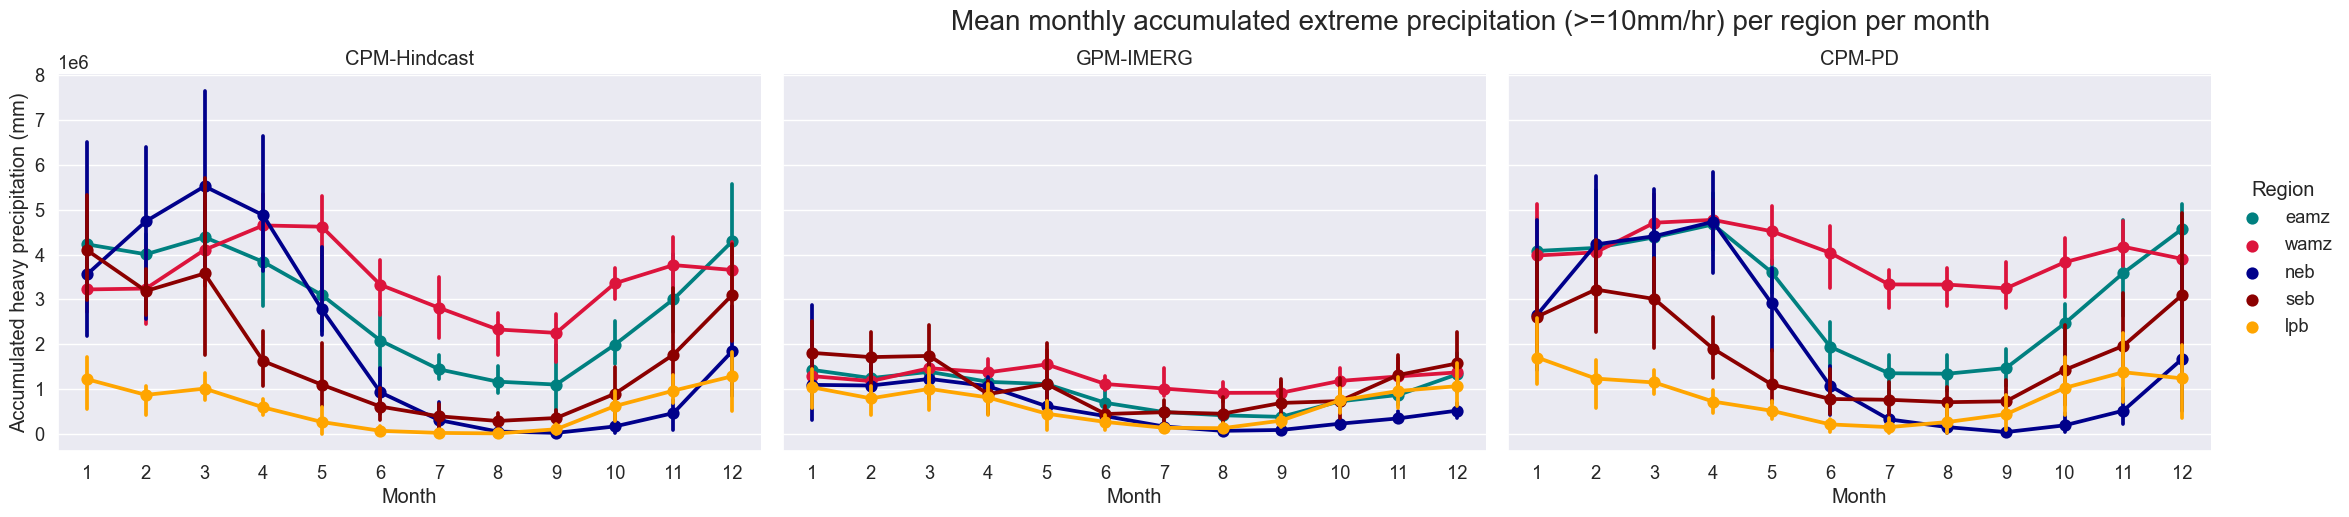

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.catplot(x="month", y="heavy_precip (mm)", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False), errorbar=("pi", 100)
)
g.set_axis_labels("Month", "Accumulated heavy precipitation (mm)")
g.legend.set_title("Region")
g.set_titles("{col_name}")
#plt.ylim(0,700000)
plt.text(-10,9000000,'Mean monthly accumulated extreme precipitation (>=10mm/hr) per region per month', fontsize=20)

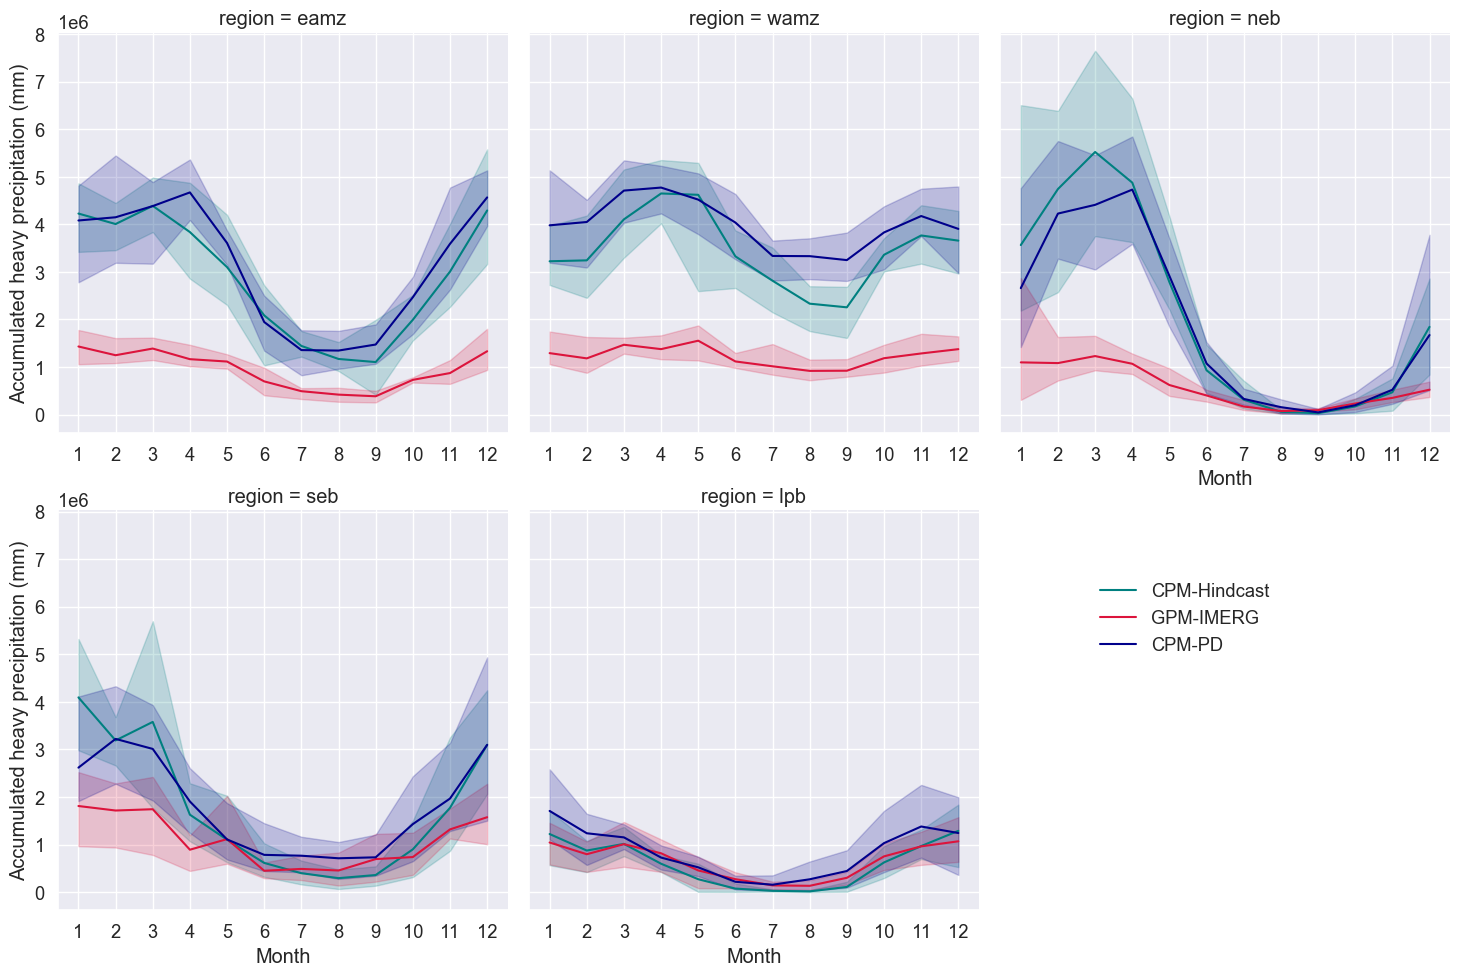

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.relplot(
    data=combined, x="month", y="heavy_precip (mm)", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), errorbar=("pi", 100)
)

g.set_axis_labels("Month", "Accumulated heavy precipitation (mm)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

**Calculating proportion of total precip in each region that comes from MCSs (NEW METHOD)**

In [ ]:
## 1) Load in mask.nc files for each year 
## 2) Do something similar to big filtering loop (if masked feature meets precip and cold core standards, how much precip is in that masked area?)
## 3) For each timestep of the rainfall field, remove values in grid points where there isn't a cloud shield
## 4) Do this for every timestep to end up with a rainfall dataset that's just rainfall from MCSs
## 5) MCS precip dataset minus all precip dataset * 100 to get % rainfall that comes from MCSs
## 6) Plot the whole domain MCS contribution to total rainfall 
## 7) Break this down into regions

In [78]:
## Testing method on 1 year (2001)

precip_file = '/scratch/hgilmour/cpm_PD/total_precip/annual_files/regridded/regridded_total_precip_2001.nc'
precip = xr.open_dataset(precip_file)
precip = precip.unknown

mask_file = '/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/segmentation/regridded/regridded_segmentation_yearly_2001.nc'
mask = xr.open_dataset(mask_file)
mask = mask.segmentation_mask

tracks = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_PD_TRACKS/final_tracks/merged/2001/CCPF_2001.hdf', 'table')


In [79]:
precip.time.shape[0]

8640

In [80]:
tracks.cell

6898     1634
6910     1634
6924     1634
6943     1634
6961     1634
         ... 
21603    5146
21612    5146
21623    5146
21633    5146
21644    5146
Name: cell, Length: 41830, dtype: int64

In [87]:
cell = 1634
subset = tracks[tracks.cell == cell]

for feature in subset.feature.values: #find all the feature values for that unique cell / track (the feature value is a unique value for each feature in a frame /timestep)
    print("Feature:", feature)
    for frame in subset.frame[subset.feature == feature]: #find the frame / timestep that corresponds to the feature number
        # print("Frame:", frame)
        print("Frame timestamp: ", str(subset['timestr'][subset.frame == frame]))


        if mask.shape == precip.shape:
        
            seg = mask[frame,:,:] #printing the segmentation mask which occurs in the same frame as the feature value
            #print(seg)
            prec = precip[frame,:,:] #printing the precip timesteps which occurs in the same frame as the feature value
            #print(prec)

            featureid = subset.feature[subset.frame == frame].values[0] #find the feature number at each timestep / frame of the cells lifetime (it changes over time and doesn't stay constant)
            print('featureid: {}'.format(featureid)) #we now know all the feature numbers that belong to a single cell over its lifetime

            print("Shape of seg:", np.shape(seg))
            labels, num_labels = ndimage.label(seg, structure = generate_binary_structure(2,2)) #this line uses ndimage package for image processing. It generates arrays of numbers and decides what are joined together and what aren't.
            # In other words, it does image segmentation tasks, such as finding connected components and labeling objects in an image.
            # (i.e. it generates the locations of all contiguous fields of the segmentation mask that belong to a specific cell at a specific timestep and gives it a label. The number of labels is also recorded (the number of segmented areas in the timestep))

Feature: 6899
Frame timestamp:  6898    2001-01-24 15:30:00
Name: timestr, dtype: object
featureid: 6899
Shape of seg: (550, 550)
Feature: 6911
Frame timestamp:  6910    2001-01-24 16:30:00
Name: timestr, dtype: object
featureid: 6911
Shape of seg: (550, 550)
Feature: 6925
Frame timestamp:  6924    2001-01-24 17:30:00
Name: timestr, dtype: object
featureid: 6925
Shape of seg: (550, 550)
Feature: 6944
Frame timestamp:  6943    2001-01-24 18:30:00
Name: timestr, dtype: object
featureid: 6944
Shape of seg: (550, 550)
Feature: 6962
Frame timestamp:  6961    2001-01-24 19:30:00
Name: timestr, dtype: object
featureid: 6962
Shape of seg: (550, 550)
Feature: 6977
Frame timestamp:  6976    2001-01-24 20:30:00
Name: timestr, dtype: object
featureid: 6977
Shape of seg: (550, 550)
Feature: 6997
Frame timestamp:  6996    2001-01-24 21:30:00
Name: timestr, dtype: object
featureid: 6997
Shape of seg: (550, 550)


In [70]:
# for index in np.arange(0,precip.time.shape[0]):
#     if (precip[index,:,:].time == mask[index,:,:].time) & (mask.shape == precip.shape):
        
#         seg = mask[index,:,:] #printing the segmentation mask which occurs in the same frame as the feature value
#         #print(seg)
#         prec = precip[index,:,:] #printing the precip timesteps which occurs in the same frame as the feature value





**Calculating proportion of total precip in each region that comes from MCSs -- THIS IS THE OLD METHOD THAT DOESN'T WORK AS WELL!!!**

In [ ]:
## 1) Load in the regions tracks (e.g. '/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/eamz_tracks_cpm.hdf')

## 2) Check that there is only years 2001-2007 in these files

## 3) For each region, sum the total_precip for each month

## 4)Create a new column in the dataframe for 'MCS contribution' and add the total_precip value to each month

## 5) Create a new column in the dataframe for 'MCS contribution as % of total" and calculate the % of the total that the MCS contribution is

## 6) Repeat for other regions

In [5]:
eamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/eamz_tracks_cpm.hdf', 'table')
wamz_tracks_cpm = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/wamz_tracks_cpm.hdf', 'table')
neb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/neb_tracks_cpm.hdf', 'table')
seb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/seb_tracks_cpm.hdf', 'table')
lpb_tracks_cpm =pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/regional_box_tracks/lpb_tracks_cpm.hdf', 'table')

In [6]:
eamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/eamz_tracks_obs.hdf', 'table')
wamz_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/wamz_tracks_obs.hdf', 'table')
neb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/neb_tracks_obs.hdf', 'table')
seb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/seb_tracks_obs.hdf', 'table')
lpb_tracks_obs = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/OBS_TRACKS/final_tracks_obs/regional_box_tracks/lpb_tracks_obs.hdf', 'table')

In [ ]:
cpm_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        7.011980e+06       4.019549e+06   
1     eamz      2  2001        6.129107e+06       3.604825e+06   
2     eamz      3  2001        6.283303e+06       3.837559e+06   
3     eamz      4  2001        4.781611e+06       2.857683e+06   
4     eamz      5  2001        3.980619e+06       2.425499e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        3.088735e+05       1.180283e+02   
416    lpb      9  2007        7.537811e+05       6.122119e+04   
417    lpb     10  2007        2.272708e+06       6.395178e+05   
418    lpb     11  2007        2.313406e+06       9.929137e+05   
419    lpb     12  2007        3.040336e+06       1.267212e+06   

     extreme_precip (mm)          type  
0          379341.870117  CPM-Hindcast  
1          346279.888916  CPM-Hindcast  
2          410591.162109  CPM-Hindcast  
3          287878.051758  CPM-Hindcast  
4          234118.487549  CPM-Hindcast  
..                   ...           ...  
415             0.000000  CPM-Hindcast  
416             0.000000  CPM-Hindcast  
417         20172.771263  CPM-Hindcast  
418         59986.175537  CPM-Hindcast  
419         97210.759735  CPM-Hindcast  

[420 rows x 7 columns]

In [ ]:
cpm_file['mcs_total_precip'] = np.nan
cpm_file['mcs_heavy_precip'] = np.nan
cpm_file['mcs_extreme_precip'] = np.nan

In [ ]:
cpm_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        7.011980e+06       4.019549e+06   
1     eamz      2  2001        6.129107e+06       3.604825e+06   
2     eamz      3  2001        6.283303e+06       3.837559e+06   
3     eamz      4  2001        4.781611e+06       2.857683e+06   
4     eamz      5  2001        3.980619e+06       2.425499e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        3.088735e+05       1.180283e+02   
416    lpb      9  2007        7.537811e+05       6.122119e+04   
417    lpb     10  2007        2.272708e+06       6.395178e+05   
418    lpb     11  2007        2.313406e+06       9.929137e+05   
419    lpb     12  2007        3.040336e+06       1.267212e+06   

     extreme_precip (mm)          type  mcs_total_precip  mcs_heavy_precip  \
0          379341.870117  CPM-Hindcast               NaN               NaN   
1          346279.888916  CPM-Hindcast               NaN               NaN   
2          410591.162109  CPM-Hindcast               NaN               NaN   
3          287878.051758  CPM-Hindcast               NaN               NaN   
4          234118.487549  CPM-Hindcast               NaN               NaN   
..                   ...           ...               ...               ...   
415             0.000000  CPM-Hindcast               NaN               NaN   
416             0.000000  CPM-Hindcast               NaN               NaN   
417         20172.771263  CPM-Hindcast               NaN               NaN   
418         59986.175537  CPM-Hindcast               NaN               NaN   
419         97210.759735  CPM-Hindcast               NaN               NaN   

     mcs_extreme_precip  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
415                 NaN  
416                 NaN  
417                 NaN  
418                 NaN  
419                 NaN  

[420 rows x 10 columns]

In [ ]:
dataframes = [eamz_tracks_cpm, wamz_tracks_cpm, neb_tracks_cpm, seb_tracks_cpm, lpb_tracks_cpm]
#i = 0

eamz_tracks_cpm.name = 'eamz'
wamz_tracks_cpm.name = 'wamz'
neb_tracks_cpm.name = 'neb'
seb_tracks_cpm.name = 'seb'
lpb_tracks_cpm.name = 'lpb'

for dataframe in dataframes:
    region = dataframe.name
    print(region)
    for year in np.unique(dataframe.datetime.dt.year):
        print(year)
        subset = dataframe[dataframe.datetime.dt.year == year]
        for month in np.unique(subset.datetime.dt.month):
            print(month)
            subset1 = subset[subset.datetime.dt.month == month]
            precip_total = subset1.total_precip.sum()
            print(precip_total)
            precip_extreme = subset1.extreme_precip.sum()
            precip_heavy = subset1.heavy_precip.sum()

            cpm_file['mcs_total_precip'][(cpm_file.year == year) & (cpm_file.month == month) & (cpm_file.region == region)] = precip_total
            cpm_file['mcs_heavy_precip'][(cpm_file.year == year) & (cpm_file.month == month) & (cpm_file.region == region)] = precip_heavy
            cpm_file['mcs_extreme_precip'][(cpm_file.year == year) & (cpm_file.month == month) & (cpm_file.region == region)] = precip_extreme

            # cpm_file.mcs_total_precip.loc[i] = precip_total
            # cpm_file.mcs_heavy_precip.loc[i] = precip_heavy
            # cpm_file.mcs_extreme_precip.loc[i] = precip_extreme
            #i = i+1
        print('Finished for year: ', year)
    print('finished for dataframe')

eamz
2001
1
1498386.1121618808
2
1412427.1229777846
3
1550344.6729813516
4
1210268.9142618375
5
1214073.7725387625
6
1664471.6677765758
7
426675.2967231083
8
722585.2665698344
9
673393.8142735981
10
1723696.8139455593
11
1244902.6423035017
12
1677291.1353784814
Finished for year:  2001
2002
1
2047322.6637036894
2
1588230.4940530383
3
1716535.681029455
4
1137735.0034161687
5
1026768.2068513269
6
1408636.4326541298
7
1014587.8858622494
8
568934.1744636025
9
992921.369851625
10
1338995.8310411836
11
1830539.2211833908
12
2309770.3736386215
Finished for year:  2002
2003
1
1752571.3881608034
2
1353846.123713065
3
1735486.925867469
4
1240411.7133277508
5
1194500.6011378388
6
736189.8834166249
7
350450.63587727695
8
824636.507121343
9
619365.0040678042
10
1281545.322135679
11
1589045.1653191443
12
1404349.7078910496
Finished for year:  2003
2004
1
2085560.8221283383
2
1842962.4496234746
3
2334266.342705569
4
1863299.2502190303
5
1700720.8050188047
6
840162.3613314264
7
750275.4186412352
8
892

In [ ]:
cpm_file.shape[0]

420

In [ ]:
cpm_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        7.011980e+06       4.019549e+06   
1     eamz      2  2001        6.129107e+06       3.604825e+06   
2     eamz      3  2001        6.283303e+06       3.837559e+06   
3     eamz      4  2001        4.781611e+06       2.857683e+06   
4     eamz      5  2001        3.980619e+06       2.425499e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        3.088735e+05       1.180283e+02   
416    lpb      9  2007        7.537811e+05       6.122119e+04   
417    lpb     10  2007        2.272708e+06       6.395178e+05   
418    lpb     11  2007        2.313406e+06       9.929137e+05   
419    lpb     12  2007        3.040336e+06       1.267212e+06   

     extreme_precip (mm)          type  mcs_total_precip  mcs_heavy_precip  \
0          379341.870117  CPM-Hindcast      1.498386e+06      9.366500e+05   
1          346279.888916  CPM-Hindcast      1.412427e+06      8.856197e+05   
2          410591.162109  CPM-Hindcast      1.550345e+06      1.015404e+06   
3          287878.051758  CPM-Hindcast      1.210269e+06      7.936620e+05   
4          234118.487549  CPM-Hindcast      1.214074e+06      8.581748e+05   
..                   ...           ...               ...               ...   
415             0.000000  CPM-Hindcast      7.317544e+04      1.971516e+03   
416             0.000000  CPM-Hindcast      7.651126e+04      1.576991e+04   
417         20172.771263  CPM-Hindcast      8.814583e+05      3.047223e+05   
418         59986.175537  CPM-Hindcast      1.204965e+06      6.231691e+05   
419         97210.759735  CPM-Hindcast      1.702243e+06      8.188041e+05   

     mcs_extreme_precip  
0         124497.461578  
1         114713.994446  
2         144651.768150  
3         120947.376263  
4         150706.528267  
..                  ...  
415            0.000000  
416            0.000000  
417        12877.010799  
418        35928.344593  
419        69852.053238  

[420 rows x 10 columns]

In [ ]:
cpm_file['mcs_contribution'] = np.nan
cpm_file['mcs_heavy_contribution'] = np.nan
cpm_file['mcs_extreme_contribution'] = np.nan

In [ ]:
for i in np.arange(0, cpm_file.shape[0]):
    print(i)
    cpm_file['mcs_contribution'].iloc[i]=(cpm_file.mcs_total_precip.iloc[i] / cpm_file['sum_of_precip (mm)'].iloc[i])*100
    cpm_file['mcs_heavy_contribution'].iloc[i]=(cpm_file.mcs_heavy_precip.iloc[i] / cpm_file['heavy_precip (mm)'].iloc[i])*100
    cpm_file['mcs_extreme_contribution'].iloc[i]=(cpm_file.mcs_extreme_precip.iloc[i] / cpm_file['extreme_precip (mm)'].iloc[i])*100

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
cpm_file.mcs_contribution[(cpm_file.region == 'seb') & (cpm_file.month == 10)].max()

29.081500903923462

In [ ]:
## NOT SURE WHAT IS GOING ON WITH THESE 3 --- POSSIBLY CHECK THE BOUNDING BOX FOR LPB TO MAKE SURE ITS THE SAME AS THE ONE USED FOR THE REGIONAL MCS ANALYSIS ##

cpm_file[cpm_file.mcs_extreme_contribution > 100]

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
51     lpb      4  2001        2.589543e+06       6.929240e+05   
52     lpb      5  2001        1.639150e+06       3.979415e+05   
68    eamz      9  2002        1.979402e+06       1.042195e+06   
112    lpb      5  2002        1.708416e+06       3.546662e+05   
113    lpb      6  2002        6.484965e+05       4.620616e+04   
115    lpb      8  2002        6.468932e+05       2.887343e+04   
155    neb     12  2003        1.607889e+06       8.411766e+05   
172    lpb      5  2003        1.107276e+06       8.235545e+04   
173    lpb      6  2003        1.072882e+06       1.804993e+05   
232    lpb      5  2004        1.451365e+06       2.798227e+05   
233    lpb      6  2004        7.886417e+05       5.163204e+04   
290    lpb      3  2005        2.178560e+06       7.544737e+05   
291    lpb      4  2005        2.734331e+06       7.738870e+05   
292    lpb      5  2005        2.197717e+06       5.960354e+05   
293    lpb      6  2005        1.388507e+06       1.691297e+05   
352    lpb      5  2006        2.963624e+05       5.405770e+03   
355    lpb      8  2006        4.508961e+05       9.844334e+03   
411    lpb      4  2007        1.552800e+06       5.549407e+05   
412    lpb      5  2007        1.182159e+06       1.725347e+05   

     extreme_precip (mm)          type  mcs_total_precip  mcs_heavy_precip  \
51          15594.179535  CPM-Hindcast      1.292282e+06     493461.382494   
52           6918.664169  CPM-Hindcast      1.535286e+06     469799.019611   
68          95177.938843  CPM-Hindcast      9.929214e+05     675724.255334   
112          3398.350239  CPM-Hindcast      1.024142e+06     344324.048886   
113             0.000000  CPM-Hindcast      1.757615e+05      80995.189941   
115           112.211864  CPM-Hindcast      6.657592e+05     118810.882754   
155         67761.364746  CPM-Hindcast      7.612481e+05     494483.055930   
172            58.502801  CPM-Hindcast      3.297341e+05      95971.074952   
173          1762.992167  CPM-Hindcast      9.825185e+05     264041.695892   
232          4539.175701  CPM-Hindcast      5.126228e+05     219305.573181   
233             0.000000  CPM-Hindcast      5.918421e+05     149813.507658   
290         45833.017731  CPM-Hindcast      1.078325e+06     396544.373596   
291         22046.323013  CPM-Hindcast      1.076686e+06     401803.603372   
292          6925.808716  CPM-Hindcast      2.023254e+06     735164.653627   
293           115.865891  CPM-Hindcast      1.112720e+06     347513.265124   
352             0.000000  CPM-Hindcast      9.564827e+04      10285.759149   
355             0.000000  CPM-Hindcast      6.338562e+05      98942.345688   
411         23605.780792  CPM-Hindcast      8.844414e+05     439027.754165   
412           398.839626  CPM-Hindcast      4.766868e+05     104880.255083   

     mcs_extreme_precip  mcs_contribution  mcs_heavy_contribution  \
51         19141.278645         49.903864               71.214361   
52         32224.380234         93.663552              118.057306   
68         96914.376377         50.162691               64.836674   
112        22869.345570         59.946879               97.083986   
113         3849.044327         27.102922              175.290899   
115         1497.400192        102.916390              411.488685   
155        70226.538307         47.344562               58.784689   
172         5156.773804         29.778853              116.532752   
173        14023.907101         91.577495              146.284021   
232         7163.329189         35.320047               78.373035   
233         6978.454479         75.045750              290.156063   
290        45928.567013         49.497150               52.559070   
291        25094.489216         39.376591               51.920190   
292        32710.378231         92.061610              123.342440   
293        28930.411964         80.137868              205.471476   
352          237.0

In [ ]:
np.unique(neb_tracks_cpm[(neb_tracks_cpm.datetime.dt.year == 2003) & (neb_tracks_cpm.datetime.dt.month == 12) & (neb_tracks_cpm.extreme_precip > 1)].cell)

array([200321915, 200321948, 200322291, 200322467, 200322571, 200322846,
       200322911, 200322977, 200323040, 200323091, 200323117, 200323136])

## TESTING WHERE THESE MCSS ARE IN RELATION TO THE REGIONAL BOXES ##

In [ ]:
## TESING WHERE THESE MCSS ARE IN RELATION TO THE REGIONAL BOXES ##
import pandas as pd
tracks = pd.read_hdf('/project/cssp_brazil/mcs_tracking_HG/CPM_HINDCAST_TRACKS/final_tracks_CPM_REGRIDDED/merged/all_years_combined_CCPF/all_years_CCPF_cpm_hindcast.hdf', 'table')

tracks.rename(columns={'projection_x_coordinate': 'longitude', 'projection_y_coordinate': 'latitude'}, inplace=True)
tracks.longitude = tracks.longitude - 360

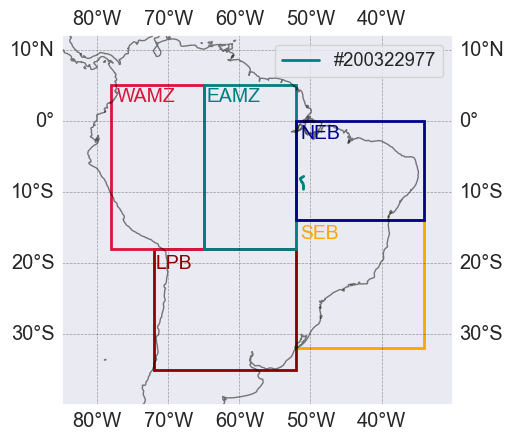

In [ ]:
# Plotting

## Create regional boxes & plot them on a map ##

import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

f=14

ax = plt.axes(projection=ccrs.PlateCarree())
#hx = m.hexbin(x_210, y_210, gridsize=(8,8),cmap='Reds',alpha=0.6,vmin=0,vmax=170)
#cbar = plt.colorbar(hx, ax=ax, shrink=0.9, pad=0.1, label='Hours with MCS present')
ax.set_extent([-85,-30,-40,12], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m',alpha=0.5)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, color='k',linestyle='--')

# ax.add_patch(mpatches.Rectangle(xy=[-70, -5], width=25, height=10, linewidth=2,
#                                 facecolor='none', edgecolor='teal',
#                                 transform=ccrs.PlateCarree()))
# ax.text(0.28, 0.83, 'NAMZ',color='teal',transform=ax.transAxes)


# ax.add_patch(mpatches.Rectangle(xy=[-70, -15], width=25, height=10, linewidth=2,
#                                 facecolor='none', edgecolor='crimson',
#                                 transform=ccrs.PlateCarree()))
# ax.text(0.28, 0.63, 'SAMZ',color='crimson',transform=ax.transAxes)


### South East Brazil (55-38^w, 25-15^S) ###
### ------------------------------------ ###
seb = ax.add_patch(mpatches.Rectangle(xy=[-52, -32], width=18, height=18, linewidth=2,
                                facecolor='none', edgecolor='orange',
                                transform=ccrs.PlateCarree()))
ax.text(0.61, 0.45, 'SEB',color='orange',transform=ax.transAxes,fontsize=f)


### East Brazil (45-35^W - 25-10^S) ###
### ------------------------------- ###
# eb = ax.add_patch(mpatches.Rectangle(xy=[-45, -25], width=10, height=17, linewidth=2,
#                                 facecolor='none', edgecolor='purple',
#                                 transform=ccrs.PlateCarree()))
# ax.text(0.74, 0.57, 'EB',color='purple',transform=ax.transAxes)


### La Plata Basin (70-45^W, 35-18^S) ###
### --------------------------------- ###
lpb = ax.add_patch(mpatches.Rectangle(xy=[-72, -35], width=20, height=17, linewidth=2,
                                facecolor='none', edgecolor='darkred',
                                transform=ccrs.PlateCarree()))
ax.text(0.24, 0.37, 'LPB',color='darkred',transform=ax.transAxes,fontsize=f)


### Western Amazon (78-65^W, 18-5^S) ###
### -------------------------------- ###
wamz = ax.add_patch(mpatches.Rectangle(xy=[-78, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='crimson',
                                transform=ccrs.PlateCarree()))
ax.text(0.14, 0.82, 'WAMZ',color='crimson',transform=ax.transAxes,fontsize=f)


### Eastern Amazon (65-52^W, 18-5^S) ###
### -------------------------------- ###
eamz = ax.add_patch(mpatches.Rectangle(xy=[-65, -18], width=13, height=23, linewidth=2,
                                facecolor='none', edgecolor='teal',
                                transform=ccrs.PlateCarree()))
ax.text(0.37, 0.82, 'EAMZ',color='teal',transform=ax.transAxes,fontsize=f)


### North East Brazil (50-35^W, 15-0^S) ###
### ----------------------------------- ###
neb = ax.add_patch(mpatches.Rectangle(xy=[-52, -14], width=18, height=14, linewidth=2,
                                facecolor='none', edgecolor='darkblue',
                                transform=ccrs.PlateCarree()))
ax.text(0.61, 0.72, 'NEB',color='darkblue',transform=ax.transAxes,fontsize=f)



# singular tracks to create legend from
ax.plot(tracks.longitude[tracks.cell == 200322977],tracks.latitude[tracks.cell == 200322977], '-',linewidth=2,zorder=2, color='teal',label='#200322977')

ax.legend(loc='best')






In [ ]:
## Masking out any months where the contribution from MCSs is > 100 %
# create a Boolean mask for the rows to remove
mask = cpm_file['mcs_contribution'] > 100

cpm_file = cpm_file[~mask]

mask = cpm_file['mcs_heavy_contribution'] > 100

cpm_file = cpm_file[~mask]

mask = cpm_file['mcs_extreme_contribution'] > 100

cpm_file = cpm_file[~mask]


In [ ]:
cpm_file[cpm_file.mcs_extreme_contribution > 100]

Empty DataFrame
Columns: [region, month, year, sum_of_precip (mm), heavy_precip (mm), extreme_precip (mm), type, mcs_total_precip, mcs_heavy_precip, mcs_extreme_precip, mcs_contribution, mcs_heavy_contribution, mcs_extreme_contribution]
Index: []

**Now the same for observations**

In [ ]:
obs_file['mcs_total_precip'] = np.zeros(416)
obs_file['mcs_heavy_precip'] = np.zeros(416)
obs_file['mcs_extreme_precip'] = np.zeros(416)

In [ ]:
dataframes = [eamz_tracks_obs, wamz_tracks_obs, neb_tracks_obs, seb_tracks_obs, lpb_tracks_obs]
#i = 0

eamz_tracks_obs.name = 'eamz'
wamz_tracks_obs.name = 'wamz'
neb_tracks_obs.name = 'neb'
seb_tracks_obs.name = 'seb'
lpb_tracks_obs.name = 'lpb'

for dataframe in dataframes:
    region = dataframe.name
    print(region)
    for year in np.unique(dataframe.datetime.dt.year):
        print(year)
        subset = dataframe[dataframe.datetime.dt.year == year]
        for month in np.unique(subset.datetime.dt.month):
            print(month)
            subset1 = subset[subset.datetime.dt.month == month]
            precip_total = subset1.total_precip.sum()
            print(precip_total)
            precip_extreme = subset1.extreme_precip.sum()
            precip_heavy = subset1.heavy_precip.sum()

            obs_file['mcs_total_precip'][(obs_file.year == year) & (obs_file.month == month) & (obs_file.region == region)] = precip_total
            obs_file['mcs_heavy_precip'][(obs_file.year == year) & (obs_file.month == month) & (obs_file.region == region)] = precip_heavy
            obs_file['mcs_extreme_precip'][(obs_file.year == year) & (obs_file.month == month) & (obs_file.region == region)] = precip_extreme

            # cpm_file.mcs_total_precip.loc[i] = precip_total
            # cpm_file.mcs_heavy_precip.loc[i] = precip_heavy
            # cpm_file.mcs_extreme_precip.loc[i] = precip_extreme
            #i = i+1
        print('Finished for year: ', year)
    print('finished for dataframe')

eamz
2001
1
2249452.1119152186
2
832519.1003121734
3
995273.9560319111
4
801272.9943476319
5
1509863.2052595336
6
794528.2281799316
7
585695.1148706377
8
272242.5368140936
9
501179.2816581726
10
721531.026691556
11
899104.8166864477
12
1936404.0117122233
Finished for year:  2001
2002
1
1176774.7808280485
2
931122.3020966053
3
1198806.806065064
4
1451351.3575783134
5
1641293.9948771112
6
649854.436886549
7
580084.3269732222
8
479055.1618614197
9
466638.11219124123
10
680194.0233480353
11
841484.6270121317
12
1605475.637405336
Finished for year:  2002
2003
1
1425404.61209625
2
1156029.2688557925
3
1233980.3160461076
4
826903.5763646737
5
1690876.3952745646
6
920641.1328192204
7
524811.5147253722
8
412074.4607582092
9
341487.0133028254
10
1117442.1656428576
11
1036251.3975077122
12
731514.8361141719
Finished for year:  2003
2004
1
1721325.8280415088
2
934563.4910561731
3
1457450.6919088417
4
1085220.7311902046
5
1475772.90965751
6
627700.9819815755
7
418002.0262040794
8
229192.54651641846

In [ ]:
obs_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        8.961834e+06       1.777290e+06   
1     eamz      2  2001        6.503194e+06       1.081699e+06   
2     eamz      3  2001        6.995929e+06       1.256366e+06   
3     eamz      4  2001        5.610566e+06       1.014347e+06   
4     eamz      5  2001        5.485962e+06       1.044445e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        7.922114e+05       9.303177e+04   
416    lpb      9  2007        1.456312e+06       1.544074e+05   
417    lpb     10  2007        2.926988e+06       4.639582e+05   
418    lpb     11  2007        2.583257e+06       5.708591e+05   
419    lpb     12  2007        3.578524e+06       6.349104e+05   

     extreme_precip (mm)       type  mcs_total_precip  mcs_heavy_precip  \
0           33442.812500  GPM-IMERG      2.249452e+06     683036.474339   
1           20748.798828  GPM-IMERG      8.325191e+05     237936.194158   
2           33688.562500  GPM-IMERG      9.952740e+05     260479.689203   
3           41627.265625  GPM-IMERG      8.012730e+05     216338.480833   
4           36410.445312  GPM-IMERG      1.509863e+06     451130.758551   
..                   ...        ...               ...               ...   
415           689.989990  GPM-IMERG      0.000000e+00          0.000000   
416             0.000000  GPM-IMERG      2.053150e+05      62789.879814   
417             0.000000  GPM-IMERG      4.718135e+05     159024.900612   
418          2852.005615  GPM-IMERG      8.381234e+05     335632.198418   
419          6179.007324  GPM-IMERG      2.601580e+05      81870.395798   

     mcs_extreme_precip  
0          15252.713173  
1           2645.754776  
2           5805.146667  
3           7248.215652  
4          21343.858932  
..                  ...  
415            0.000000  
416          516.940903  
417            0.000000  
418         4352.094341  
419         1164.091843  

[416 rows x 10 columns]

In [ ]:
obs_file['mcs_contribution']=(obs_file.mcs_total_precip / obs_file['sum_of_precip (mm)'])*100
obs_file['mcs_heavy_contribution']=(obs_file.mcs_heavy_precip / obs_file['heavy_precip (mm)'])*100
obs_file['mcs_extreme_contribution']=(obs_file.mcs_extreme_precip / obs_file['extreme_precip (mm)'])*100

In [ ]:
obs_file

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        8.961834e+06       1.777290e+06   
1     eamz      2  2001        6.503194e+06       1.081699e+06   
2     eamz      3  2001        6.995929e+06       1.256366e+06   
3     eamz      4  2001        5.610566e+06       1.014347e+06   
4     eamz      5  2001        5.485962e+06       1.044445e+06   
..     ...    ...   ...                 ...                ...   
415    lpb      8  2007        7.922114e+05       9.303177e+04   
416    lpb      9  2007        1.456312e+06       1.544074e+05   
417    lpb     10  2007        2.926988e+06       4.639582e+05   
418    lpb     11  2007        2.583257e+06       5.708591e+05   
419    lpb     12  2007        3.578524e+06       6.349104e+05   

     extreme_precip (mm)       type  mcs_total_precip  mcs_heavy_precip  \
0           33442.812500  GPM-IMERG      2.249452e+06     683036.474339   
1           20748.798828  GPM-IMERG      8.325191e+05     237936.194158   
2           33688.562500  GPM-IMERG      9.952740e+05     260479.689203   
3           41627.265625  GPM-IMERG      8.012730e+05     216338.480833   
4           36410.445312  GPM-IMERG      1.509863e+06     451130.758551   
..                   ...        ...               ...               ...   
415           689.989990  GPM-IMERG      0.000000e+00          0.000000   
416             0.000000  GPM-IMERG      2.053150e+05      62789.879814   
417             0.000000  GPM-IMERG      4.718135e+05     159024.900612   
418          2852.005615  GPM-IMERG      8.381234e+05     335632.198418   
419          6179.007324  GPM-IMERG      2.601580e+05      81870.395798   

     mcs_extreme_precip  mcs_contribution  mcs_heavy_contribution  \
0          15252.713173         25.100355               38.431352   
1           2645.754776         12.801695               21.996528   
2           5805.146667         14.226473               20.732779   
3           7248.215652         14.281500               21.327864   
4          21343.858932         27.522303               43.193340   
..                  ...               ...                     ...   
415            0.000000          0.000000                0.000000   
416          516.940903         14.098287               40.665078   
417            0.000000         16.119416               34.275697   
418         4352.094341         32.444445               58.794231   
419         1164.091843          7.269982               12.894796   

     mcs_extreme_contribution  
0                   45.608345  
1                   12.751364  
2                   17.231803  
3                   17.412183  
4                   58.620154  
..                        ...  
415                  0.000000  
416                       inf  
417                       NaN  
418                152.597678  
419                 18.839464  

[416 rows x 13 columns]

In [ ]:
obs_file[obs_file.mcs_extreme_contribution > 100]

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
24     neb      1  2001        3.788546e+06       6.220441e+05   
25     neb      2  2001        4.181773e+06       8.022170e+05   
33     neb     10  2001        1.722628e+06       3.082649e+05   
55     lpb      8  2001        1.280196e+06       1.481121e+05   
85     neb      2  2002        3.868873e+06       8.695974e+05   
93     neb     10  2002        8.482735e+05       1.521686e+05   
111    lpb      4  2002        3.212054e+06       8.872142e+05   
116    lpb      9  2002        1.850268e+06       4.180988e+05   
141   wamz     10  2003        4.866884e+06       8.820824e+05   
177    lpb     10  2003        2.628747e+06       5.667211e+05   
235    lpb      8  2004        5.397623e+05       4.905162e+04   
288    lpb      1  2005        3.882672e+06       9.263357e+05   
308   eamz      9  2006        2.348350e+06       3.006832e+05   
312   wamz      1  2006        8.190189e+06       1.744795e+06   
332    neb      9  2006        7.991854e+05       1.345590e+05   
411    lpb      4  2007        2.504584e+06       5.785544e+05   
416    lpb      9  2007        1.456312e+06       1.544074e+05   
418    lpb     11  2007        2.583257e+06       5.708591e+05   

     extreme_precip (mm)       type  mcs_total_precip  mcs_heavy_precip  \
24           6955.930664  GPM-IMERG      1.231612e+06     347818.689264   
25          18775.617188  GPM-IMERG      1.095579e+06     370586.952559   
33           4981.083496  GPM-IMERG      5.523342e+05     188825.432528   
55             50.814716  GPM-IMERG      2.265090e+05      40572.091145   
85          39422.257812  GPM-IMERG      1.081728e+06     402642.567557   
93            531.791260  GPM-IMERG      4.478662e+05     139347.723607   
111          6865.109863  GPM-IMERG      4.779661e+05     178594.712728   
116            53.643814  GPM-IMERG      7.424801e+05     202824.705368   
141         15573.473633  GPM-IMERG      1.501203e+06     457044.709897   
177           107.159180  GPM-IMERG      4.054841e+05     104121.204288   
235           235.988007  GPM-IMERG      1.189674e+05      23544.707342   
288          7117.611328  GPM-IMERG      5.696729e+05     280164.668103   
308          1127.836670  GPM-IMERG      3.904020e+05      75972.011525   
312         54436.894531  GPM-IMERG      1.918035e+06     754452.061988   
332           205.537109  GPM-IMERG      2.770739e+05      84021.721634   
411          1475.952271  GPM-IMERG      3.167659e+05     102063.654942   
416             0.000000  GPM-IMERG      2.053150e+05      62789.879814   
418          2852.005615  GPM-IMERG      8.381234e+05     335632.198418   

     mcs_extreme_precip  mcs_contribution  mcs_heavy_contribution  \
24         11717.499660         32.508826               55.915442   
25         30013.639977         26.198924               46.195350   
33          6846.695930         32.063470               61.254281   
55           565.471230         17.693307               27.392822   
85         49316.034218         27.959769               46.302180   
93          1613.475365         52.797385               91.574581   
111        18100.689468         14.880388               20.129829   
116         1695.410034         40.128249               48.511189   
141        27175.627266         30.845254               51.814289   
177          107.784946         15.424996               18.372565   
235          429.679153         22.040701               47.999852   
288        24085.908222         14.672187               30.244400   
308         1165.995850         16.624525               25.266467   
312        77668.698433         23.418693               43.240164   
332          270.943707         34.669536               62.442298   
411         1481.410904         12.647446               17.641150   
416          516.940903         14.098287               40.665078   
418         4352.094341         32.444445               58.794231   

     mcs_ex

In [ ]:
## Masking out any months where the contribution from MCSs is > 100 %
# create a Boolean mask for the rows to remove

mask = obs_file['mcs_extreme_contribution'] > 100

obs_file = obs_file[~mask]

In [ ]:
cpm_file.mcs_contribution[(cpm_file.region == 'lpb') & (cpm_file.month == 10)].max()

67.77311088110457

**Combine cpm_file with obs_file**

In [ ]:
combined = []

In [ ]:
## Join the 2 separate dataframes together (obs and cpm to make it easier to plot) ##
combined = cpm_file.append(obs_file, ignore_index=True)

In [ ]:
combined

region  month  year  sum_of_precip (mm)  heavy_precip (mm)  \
0     eamz      1  2001        7.011980e+06       4.019549e+06   
1     eamz      2  2001        6.129107e+06       3.604825e+06   
2     eamz      3  2001        6.283303e+06       3.837559e+06   
3     eamz      4  2001        4.781611e+06       2.857683e+06   
4     eamz      5  2001        3.980619e+06       2.425499e+06   
..     ...    ...   ...                 ...                ...   
790    lpb      6  2007        7.503040e+05       7.989477e+04   
791    lpb      7  2007        8.777066e+05       1.310074e+05   
792    lpb      8  2007        7.922114e+05       9.303177e+04   
793    lpb     10  2007        2.926988e+06       4.639582e+05   
794    lpb     12  2007        3.578524e+06       6.349104e+05   

     extreme_precip (mm)          type  mcs_total_precip  mcs_heavy_precip  \
0          379341.870117  CPM-Hindcast      1.498386e+06      9.366500e+05   
1          346279.888916  CPM-Hindcast      1.412427e+06      8.856197e+05   
2          410591.162109  CPM-Hindcast      1.550345e+06      1.015404e+06   
3          287878.051758  CPM-Hindcast      1.210269e+06      7.936620e+05   
4          234118.487549  CPM-Hindcast      1.214074e+06      8.581748e+05   
..                   ...           ...               ...               ...   
790           317.231537     GPM-IMERG      0.000000e+00      0.000000e+00   
791             0.000000     GPM-IMERG      0.000000e+00      0.000000e+00   
792           689.989990     GPM-IMERG      0.000000e+00      0.000000e+00   
793             0.000000     GPM-IMERG      4.718135e+05      1.590249e+05   
794          6179.007324     GPM-IMERG      2.601580e+05      8.187040e+04   

     mcs_extreme_precip  mcs_contribution  mcs_heavy_contribution  \
0         124497.461578         21.368946               23.302362   
1         114713.994446         23.044583               24.567617   
2         144651.768150         24.674041               26.459625   
3         120947.376263         25.310902               27.772916   
4         150706.528267         30.499622               35.381377   
..                  ...               ...                     ...   
790            0.000000          0.000000                0.000000   
791            0.000000          0.000000                0.000000   
792            0.000000          0.000000                0.000000   
793            0.000000         16.119416               34.275697   
794         1164.091843          7.269982               12.894796   

     mcs_extreme_contribution  
0                   32.819330  
1                   33.127536  
2                   35.230122  
3                   42.013407  
4                   64.371904  
..                        ...  
790                  0.000000  
791                       NaN  
792                  0.000000  
793                       NaN  
794                 18.839464  

[795 rows x 13 columns]

In [ ]:
combined[(combined.region == 'lpb') & (combined.month == 6) & (combined.type == 'CPM-Hindcast')].mcs_contribution.min()

33.61969634433117

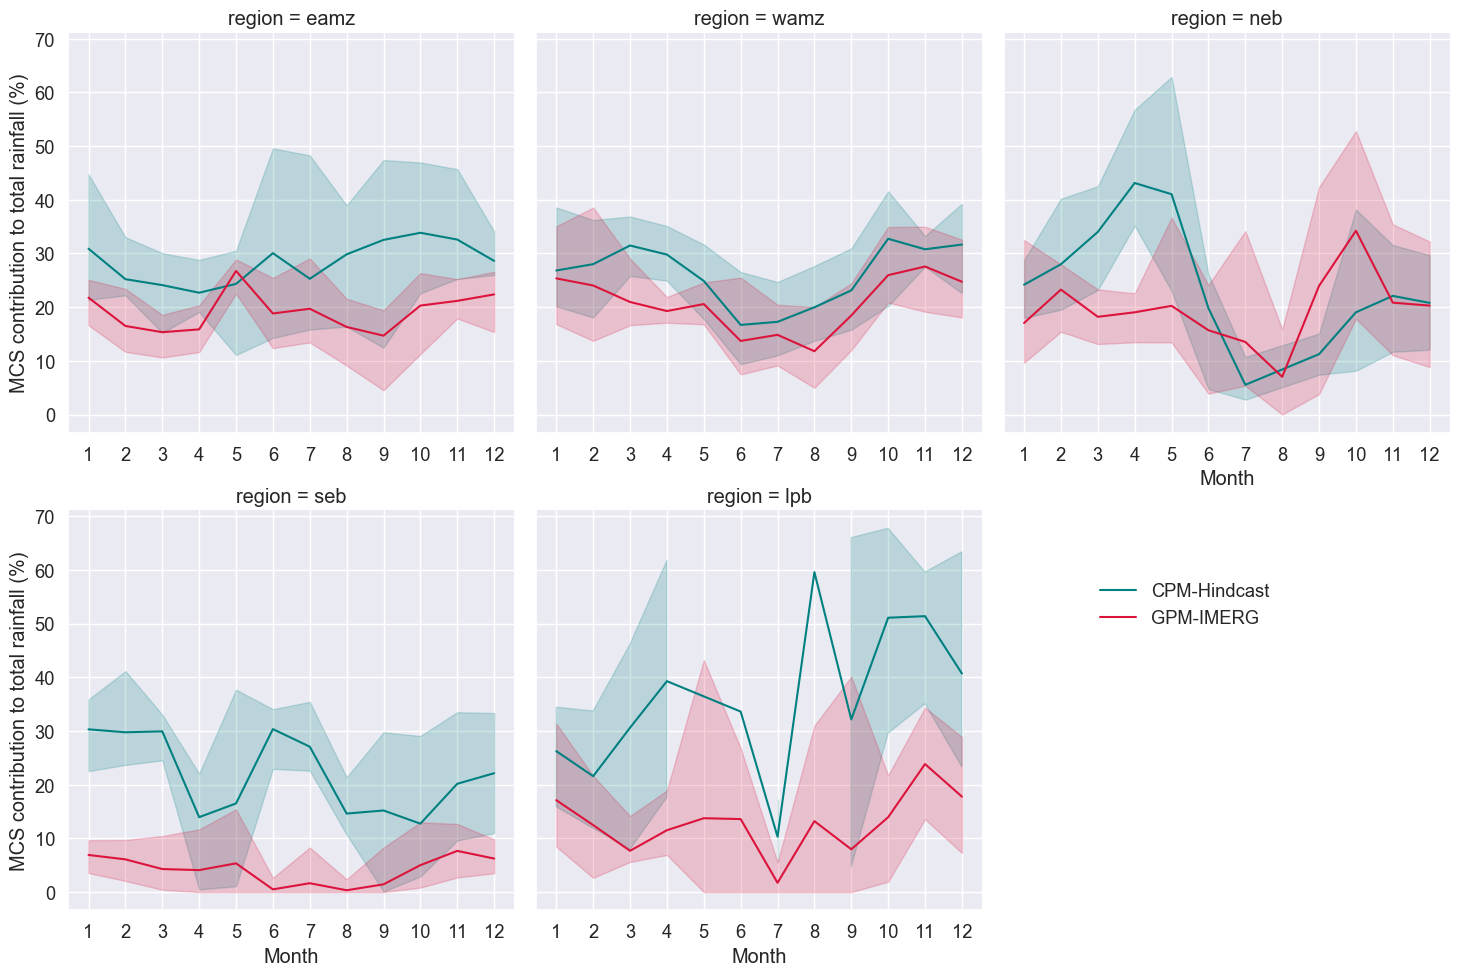

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.relplot(
    data=combined, x="month", y="mcs_contribution", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), errorbar=("pi", 100)
)

g.set_axis_labels("Month", "MCS contribution to total rainfall (%)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

Text(-8, 120, 'Mean monthly MCS contribution to total rainfall per region per month')

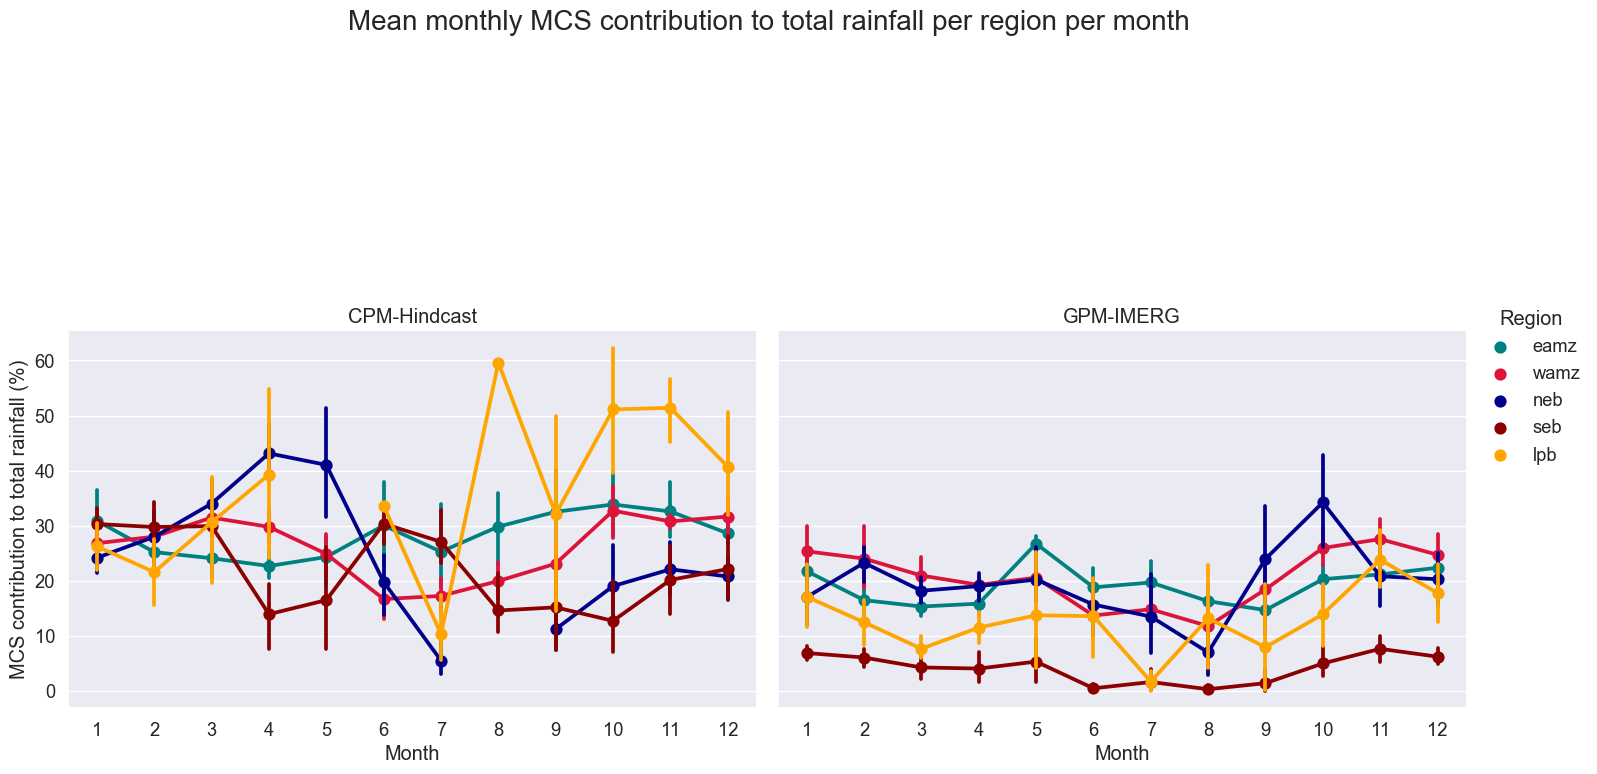

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.catplot(x="month", y="mcs_contribution", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False)
)
g.set_axis_labels("Month", "MCS contribution to total rainfall (%)")
g.legend.set_title("Region")
g.set_titles("{col_name}")
#plt.ylim(0,700000)
plt.text(-8,120,'Mean monthly MCS contribution to total rainfall per region per month', fontsize=20)

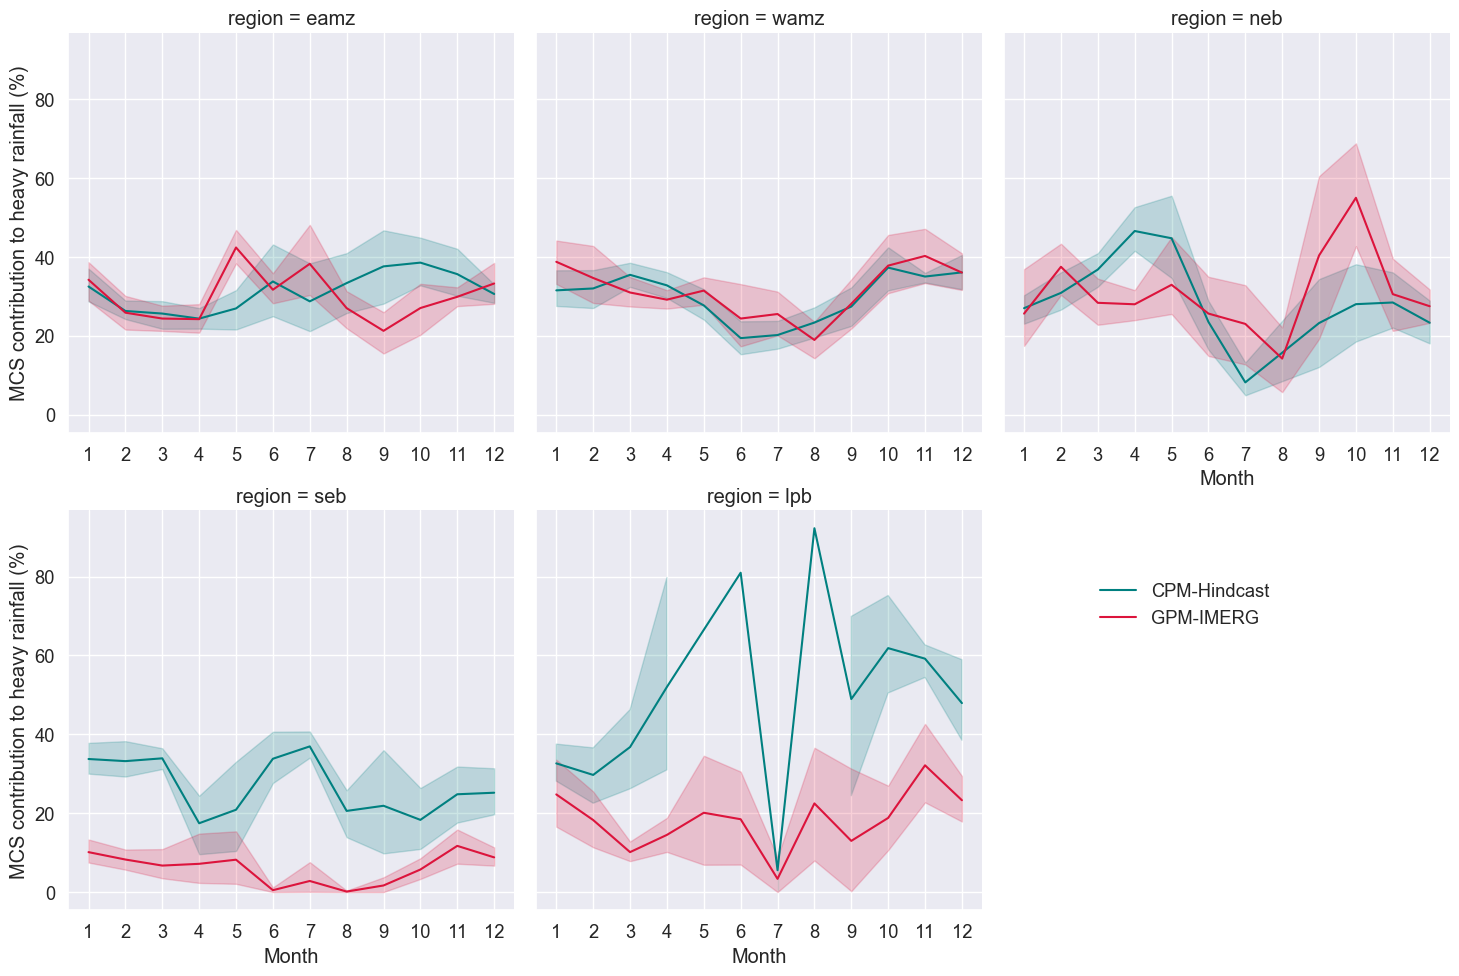

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.relplot(
    data=combined, x="month", y="mcs_heavy_contribution", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), 
)

g.set_axis_labels("Month", "MCS contribution to heavy rainfall (%)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

In [ ]:
cpm_file[cpm_file['mcs_extreme_contribution'] > 100]

Empty DataFrame
Columns: [region, month, year, sum_of_precip (mm), heavy_precip (mm), extreme_precip (mm), type, mcs_total_precip, mcs_heavy_precip, mcs_extreme_precip, mcs_contribution, mcs_heavy_contribution, mcs_extreme_contribution]
Index: []

Text(-8, 120, 'Mean monthly MCS contribution to heavy rainfall per region per month')

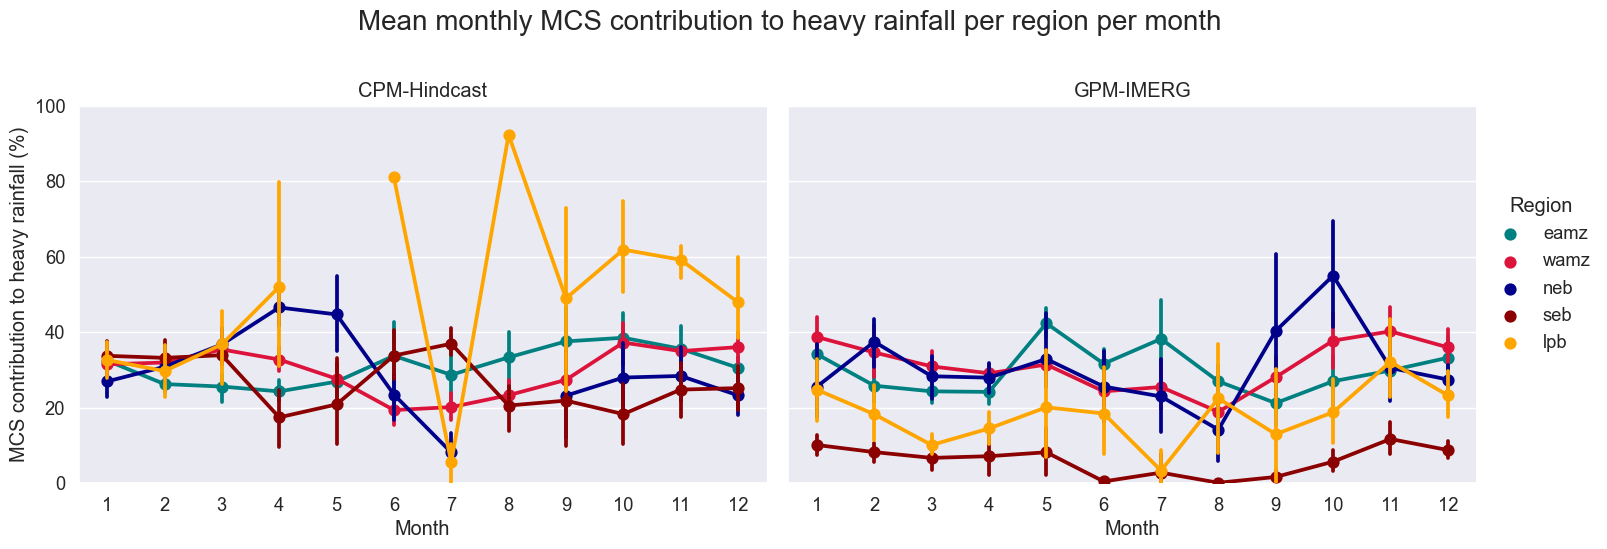

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.catplot(x="month", y="mcs_heavy_contribution", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False)
)
g.set_axis_labels("Month", "MCS contribution to heavy rainfall (%)")
g.legend.set_title("Region")
g.set_titles("{col_name}")
plt.ylim(0,100)
plt.text(-8,120,'Mean monthly MCS contribution to heavy rainfall per region per month', fontsize=20)

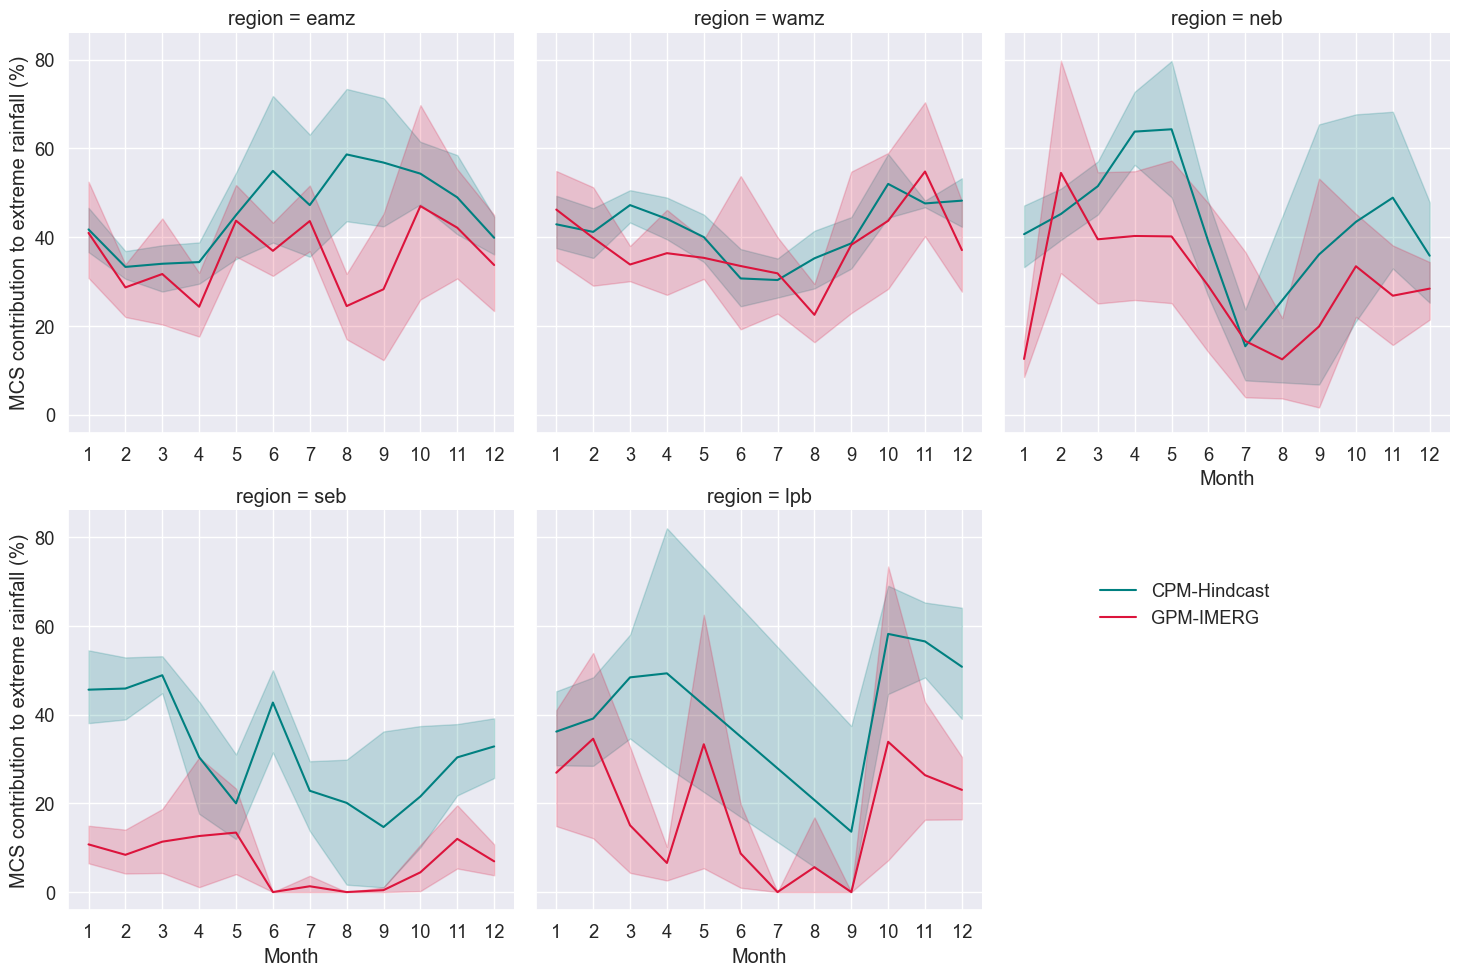

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.relplot(
    data=combined, x="month", y="mcs_extreme_contribution", hue='type',
    col="region",
    kind="line", col_wrap=3, palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], facet_kws=dict(sharex=False), 
)

g.set_axis_labels("Month", "MCS contribution to extreme rainfall (%)")
g.legend.set_title(" ")
g.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(.65, .45))
g.set(xticks=np.arange(1,13,1))
g.set_xticklabels(labels=np.arange(1,13), step=1)

Text(-8, 120, 'Mean monthly MCS contribution to extreme rainfall per region per month')

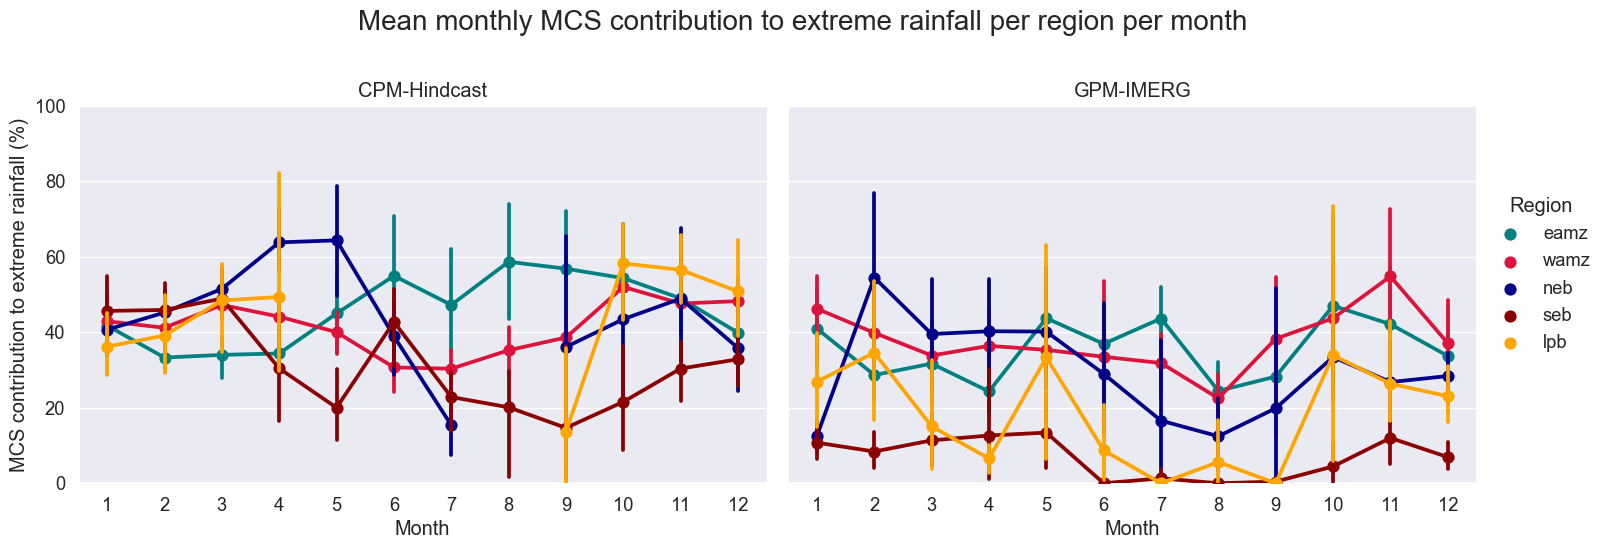

In [ ]:

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

g = sns.catplot(x="month", y="mcs_extreme_contribution", hue="region", data=combined, col='type',
    palette=['teal', 'crimson', 'darkblue', 'darkred', 'orange'], kind='point', aspect=1.5, facet_kws=dict(sharex=False)
)
g.set_axis_labels("Month", "MCS contribution to extreme rainfall (%)")
g.legend.set_title("Region")
g.set_titles("{col_name}")
plt.ylim(0,100)
plt.text(-8,120,'Mean monthly MCS contribution to extreme rainfall per region per month', fontsize=20)